# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")

!pip install pmdarima --quiet
import pmdarima as pm

!pip install tvdatafeed --quiet
from tvDatafeed import TvDatafeed ,Interval

%matplotlib inline

     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 47.6 MB/s 
     |████████████████████████████████| 55 kB 2.1 MB/s 


In [2]:
tv = TvDatafeed()
data = tv.get_hist(symbol='TCS',exchange='NSE',n_bars=5000)
data['date'] = data.index.astype(str)
new = data['date'].str.split(' ',expand=True)
data['date'] = new[0]
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
data

,symbol,open,high,low,close,volume
date,,,,,,
2004-08-25,NSE:TCS,149.837500,149.837500,122.375000,123.493751,136930976.0
2004-08-26,NSE:TCS,124.000000,124.625000,121.912499,122.375000,40443200.0
2004-08-27,NSE:TCS,122.800003,122.800003,119.818749,120.331253,30646000.0
2004-08-30,NSE:TCS,121.237503,123.750000,120.625000,123.343750,24465208.0
2004-08-31,NSE:TCS,123.312500,123.750000,122.000000,123.512497,21194656.0
...,...,...,...,...,...,...
2022-10-20,NSE:TCS,3105.000000,3160.000000,3105.000000,3157.300000,1587601.0
2022-10-21,NSE:TCS,3157.800000,3160.399900,3127.000000,3137.399900,1021913.0
2022-10-24,NSE:TCS,3170.100100,3178.000000,3155.000000,3161.700000,260949.0


In [3]:
timeseriesdf = data[['close']]
timeseriesdf

,close
date,
2004-08-25,123.493751
2004-08-26,122.375000
2004-08-27,120.331253
2004-08-30,123.343750
2004-08-31,123.512497
...,...
2022-10-20,3157.300000
2022-10-21,3137.399900
2022-10-24,3161.700000


In [4]:
timeseriessq = data['close']
timeseriessq

date
2004-08-25     123.493751
2004-08-26     122.375000
2004-08-27     120.331253
2004-08-30     123.343750
2004-08-31     123.512497
                 ...     
2022-10-20    3157.300000
2022-10-21    3137.399900
2022-10-24    3161.700000
2022-10-25    3162.100100
2022-10-27    3157.399900
Name: close, Length: 4491, dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4491 entries, 2004-08-25 to 2022-10-27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  4491 non-null   object 
 1   open    4491 non-null   float64
 2   high    4491 non-null   float64
 3   low     4491 non-null   float64
 4   close   4491 non-null   float64
 5   volume  4491 non-null   float64
dtypes: float64(5), object(1)
memory usage: 245.6+ KB


In [6]:
data.index

DatetimeIndex(['2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01', '2004-09-02', '2004-09-03',
               '2004-09-06', '2004-09-07',
               ...
               '2022-10-13', '2022-10-14', '2022-10-17', '2022-10-18',
               '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-24',
               '2022-10-25', '2022-10-27'],
              dtype='datetime64[ns]', name='date', length=4491, freq=None)

# Visualisation

In [7]:
plt.figure(figsize=(20,8))
fig = cf.Figure(data=[cf.Candlestick(x=data.index, 
                open=data['open'],
                high = data['high'],
                low = data['low'],
                close = data['close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

<Figure size 1440x576 with 0 Axes>

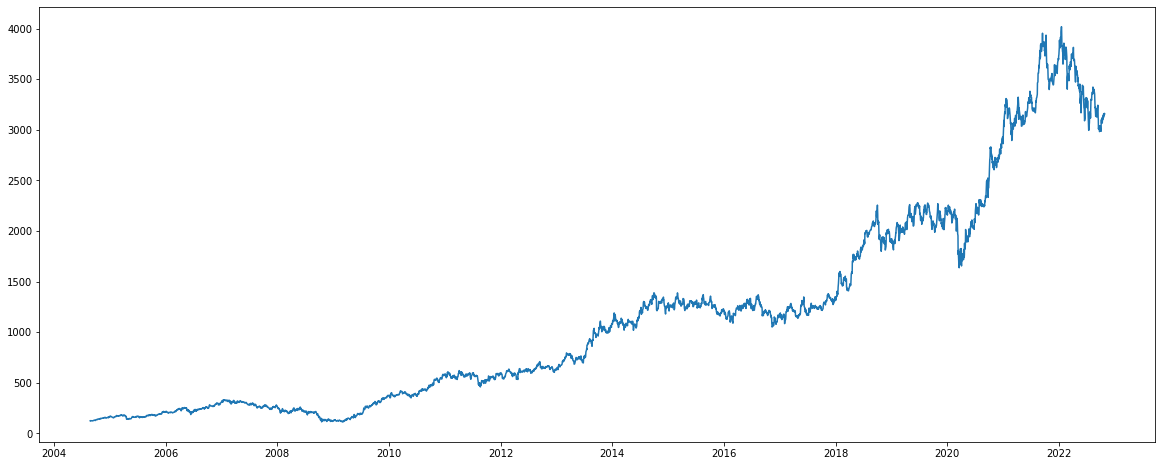

In [8]:
plt.figure(figsize = (20,8))
plt.plot(data.close)

#### Histogram and Density Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcabc7b9d0>,
      dtype=object)

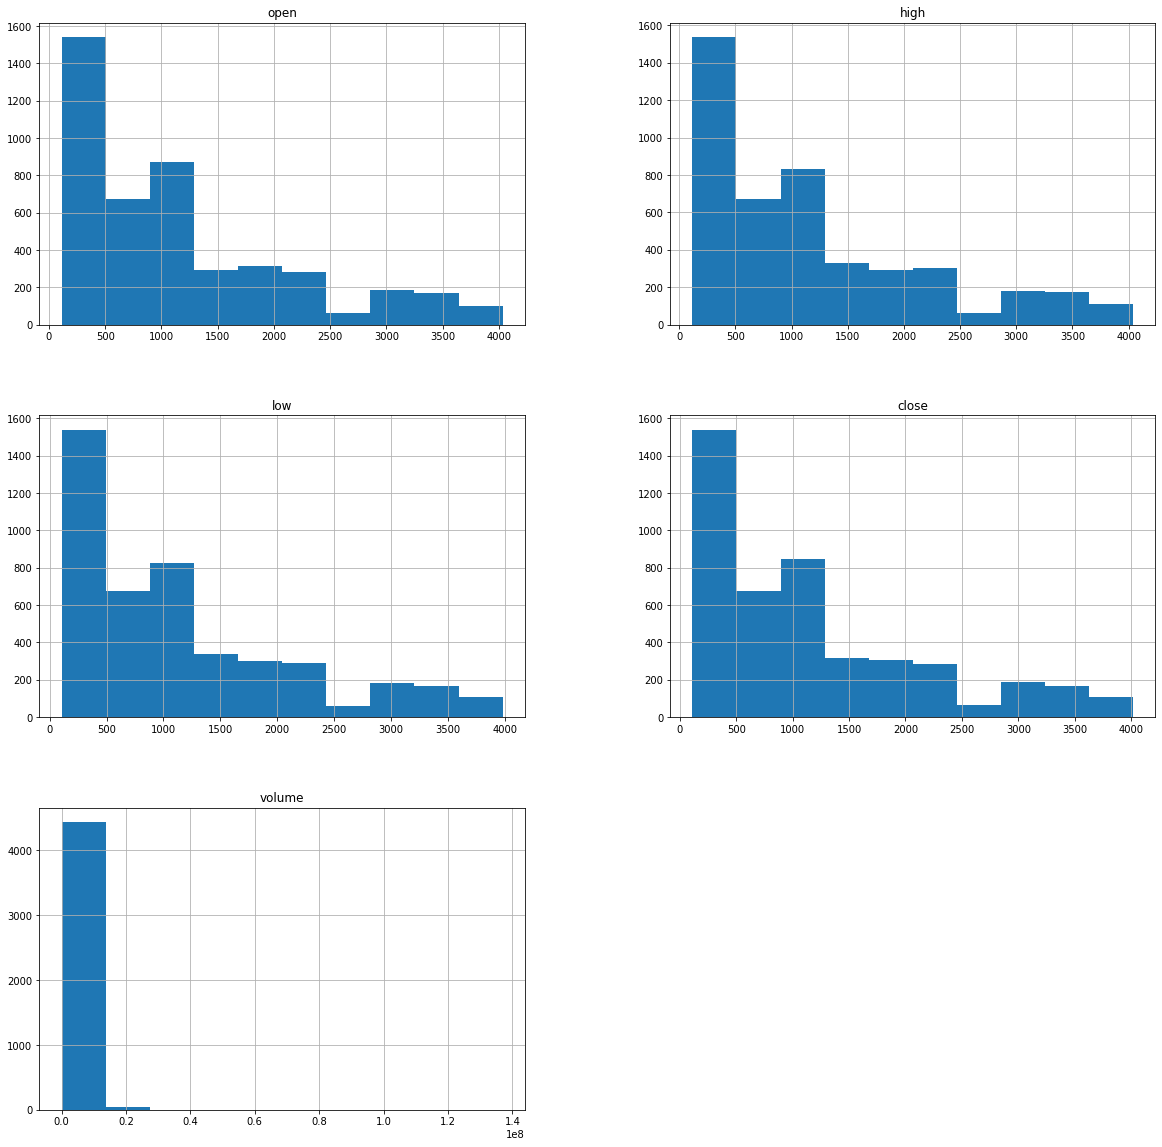

In [9]:
# create a histogram plot
plt.rc("figure", figsize=(20,20))
data.hist()

#### Box and Whisker Plots by Interval

In [10]:
# create a boxplot of yearly data
databoxplot = data
databoxplot['date'] = databoxplot.index.astype(str)
new = databoxplot['date'].str.split(' ',expand=True)
databoxplot['date'] = new[0]
databoxplot = databoxplot[['date','close']]
databoxplot['year'] = databoxplot['date'].str[:4].astype(int)
databoxplot['date1'] = databoxplot['date'].str[5:]
databoxplot

,date,close,year,date1
date,,,,
2004-08-25,2004-08-25,123.493751,2004,08-25
2004-08-26,2004-08-26,122.375000,2004,08-26
2004-08-27,2004-08-27,120.331253,2004,08-27
2004-08-30,2004-08-30,123.343750,2004,08-30
2004-08-31,2004-08-31,123.512497,2004,08-31
...,...,...,...,...
2022-10-20,2022-10-20,3157.300000,2022,10-20
2022-10-21,2022-10-21,3137.399900,2022,10-21
2022-10-24,2022-10-24,3161.700000,2022,10-24


In [11]:
databoxplot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4491 entries, 2004-08-25 to 2022-10-27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4491 non-null   object 
 1   close   4491 non-null   float64
 2   year    4491 non-null   int64  
 3   date1   4491 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 175.4+ KB


In [12]:
years = pd.pivot_table(databoxplot,index = 'date1', values = 'close',columns='year', aggfunc = sum)

years

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
date1,,,,,,,,,,,,,,,,,,,
01-01,NaN,NaN,NaN,NaN,263.637500,124.212502,NaN,NaN,NaN,632.07500,1076.85000,1272.77500,1208.19995,NaN,1322.80005,1902.80,2167.6001,2928.2500,NaN
01-02,NaN,NaN,210.95000,312.1250,262.500000,124.574997,NaN,NaN,589.300,631.65000,1083.97500,1289.72500,NaN,1180.67505,1315.60000,1923.30,2157.6499,NaN,NaN
01-03,NaN,169.15625,216.65000,320.0375,252.762500,NaN,NaN,579.025,598.800,640.30000,1112.05005,NaN,NaN,1184.12500,1319.32495,1899.95,2200.6499,NaN,3817.75
01-04,NaN,167.65625,217.88750,314.7625,251.300000,NaN,375.82501,572.375,586.500,649.60000,NaN,NaN,1184.80005,1189.75000,1328.55005,1876.85,NaN,3039.4500,3884.75
01-05,NaN,165.62500,216.54375,315.7500,NaN,128.812500,375.92499,579.475,586.000,NaN,NaN,1270.12500,1174.47500,1167.19995,1344.60000,NaN,NaN,3093.0000,3860.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,158.81875,212.26875,299.00000,277.6875,NaN,NaN,570.60000,589.000,625.475,1082.57495,NaN,NaN,1161.69995,1309.94995,1908.95000,2198.50,NaN,3696.1001,NaN
12-28,163.66875,210.70625,302.97500,270.5375,NaN,NaN,573.17500,584.600,633.750,NaN,NaN,1231.35000,1156.69995,1313.47500,1896.05000,NaN,2929.3999,3706.5500,NaN
12-29,165.03125,213.75625,305.50000,NaN,119.199997,370.700010,578.47500,582.850,NaN,NaN,1261.44995,1227.90000,1175.85000,1350.60000,NaN,NaN,2930.5000,3694.7000,NaN


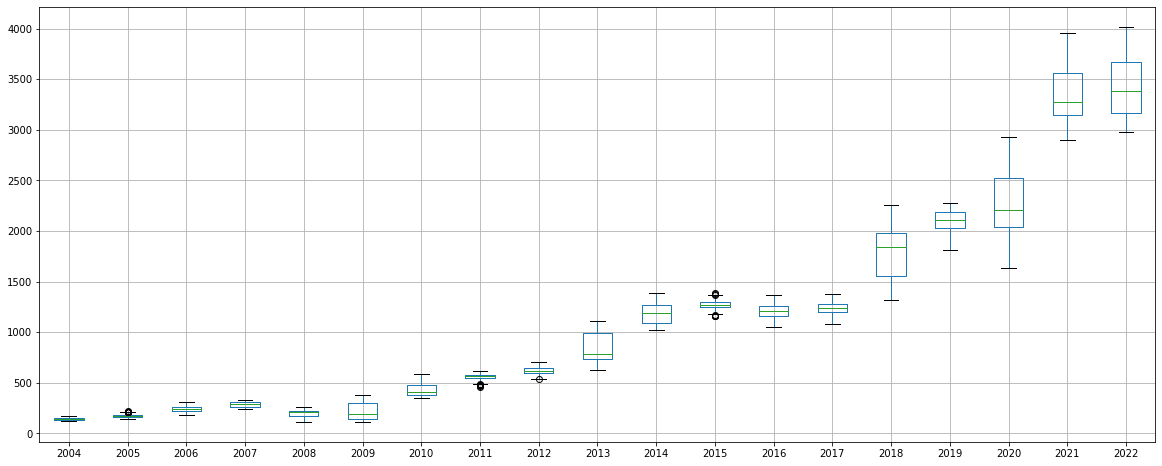

In [13]:
plt.figure(figsize = (20,8))
years.boxplot()

#### Lag plot

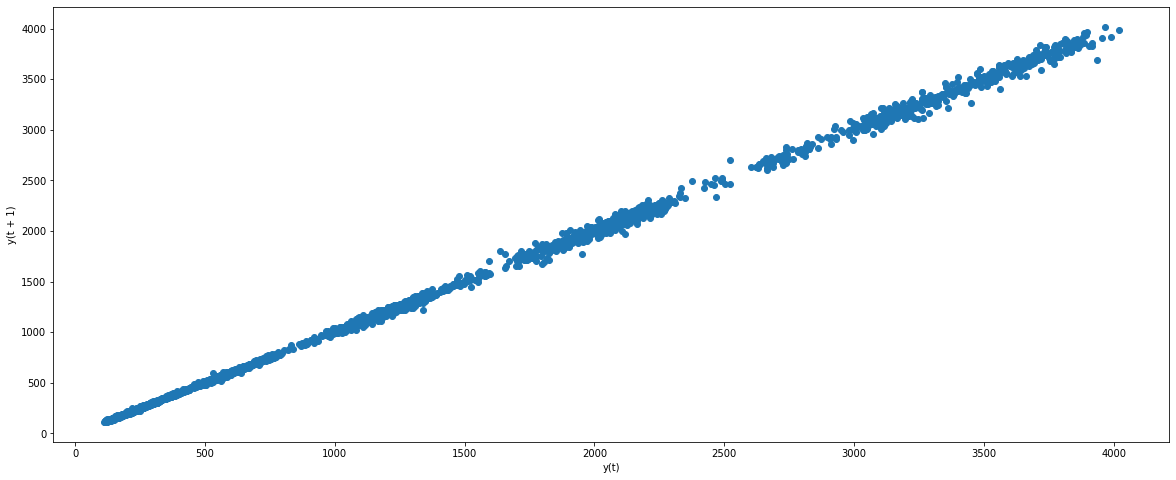

In [14]:
# create a scatter plot
plt.figure(figsize = (20,8))
pd.plotting.lag_plot(timeseriesdf)

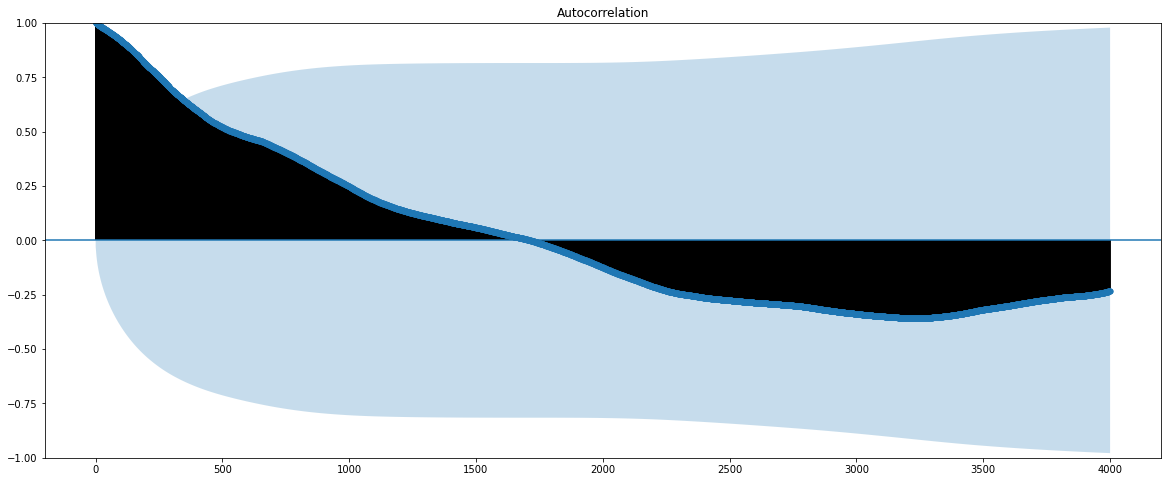

In [15]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(20,8))
plot_acf(timeseriesdf, lags=4000)
plt.show()

# Taking care of outliers

In [16]:
data

,symbol,open,high,low,close,volume,date
date,,,,,,,
2004-08-25,NSE:TCS,149.837500,149.837500,122.375000,123.493751,136930976.0,2004-08-25
2004-08-26,NSE:TCS,124.000000,124.625000,121.912499,122.375000,40443200.0,2004-08-26
2004-08-27,NSE:TCS,122.800003,122.800003,119.818749,120.331253,30646000.0,2004-08-27
2004-08-30,NSE:TCS,121.237503,123.750000,120.625000,123.343750,24465208.0,2004-08-30
2004-08-31,NSE:TCS,123.312500,123.750000,122.000000,123.512497,21194656.0,2004-08-31
...,...,...,...,...,...,...,...
2022-10-20,NSE:TCS,3105.000000,3160.000000,3105.000000,3157.300000,1587601.0,2022-10-20
2022-10-21,NSE:TCS,3157.800000,3160.399900,3127.000000,3137.399900,1021913.0,2022-10-21
2022-10-24,NSE:TCS,3170.100100,3178.000000,3155.000000,3161.700000,260949.0,2022-10-24


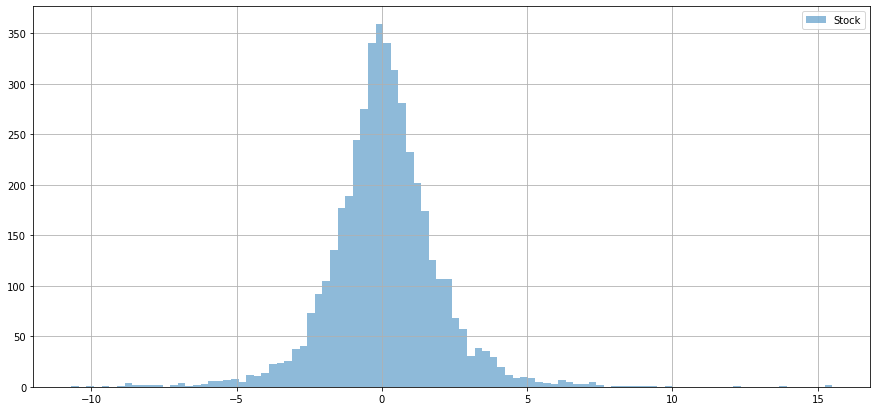

In [17]:
data['returns percentage'] = ((data['close']/data['close'].shift(1)) -1)*100
data['returns percentage'].hist(bins = 100, label = 'Stock', alpha = 0.5, figsize = (15,7))
plt.legend()

In [18]:
data

,symbol,open,high,low,close,volume,date,returns percentage
date,,,,,,,,
2004-08-25,NSE:TCS,149.837500,149.837500,122.375000,123.493751,136930976.0,2004-08-25,NaN
2004-08-26,NSE:TCS,124.000000,124.625000,121.912499,122.375000,40443200.0,2004-08-26,-0.905917
2004-08-27,NSE:TCS,122.800003,122.800003,119.818749,120.331253,30646000.0,2004-08-27,-1.670069
2004-08-30,NSE:TCS,121.237503,123.750000,120.625000,123.343750,24465208.0,2004-08-30,2.503504
2004-08-31,NSE:TCS,123.312500,123.750000,122.000000,123.512497,21194656.0,2004-08-31,0.136811
...,...,...,...,...,...,...,...,...
2022-10-20,NSE:TCS,3105.000000,3160.000000,3105.000000,3157.300000,1587601.0,2022-10-20,1.135541
2022-10-21,NSE:TCS,3157.800000,3160.399900,3127.000000,3137.399900,1021913.0,2022-10-21,-0.630289
2022-10-24,NSE:TCS,3170.100100,3178.000000,3155.000000,3161.700000,260949.0,2022-10-24,0.774530


In [19]:
datac = data.iloc[1:]
x = datac['returns percentage']
x

date
2004-08-26   -0.905917
2004-08-27   -1.670069
2004-08-30    2.503504
2004-08-31    0.136811
2004-09-01   -0.020237
                ...   
2022-10-20    1.135541
2022-10-21   -0.630289
2022-10-24    0.774530
2022-10-25    0.012655
2022-10-27   -0.148642
Name: returns percentage, Length: 4490, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbca84f9a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbca84fe4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbca84f9490>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbca84fef90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbca8506510>],
 'means': []}

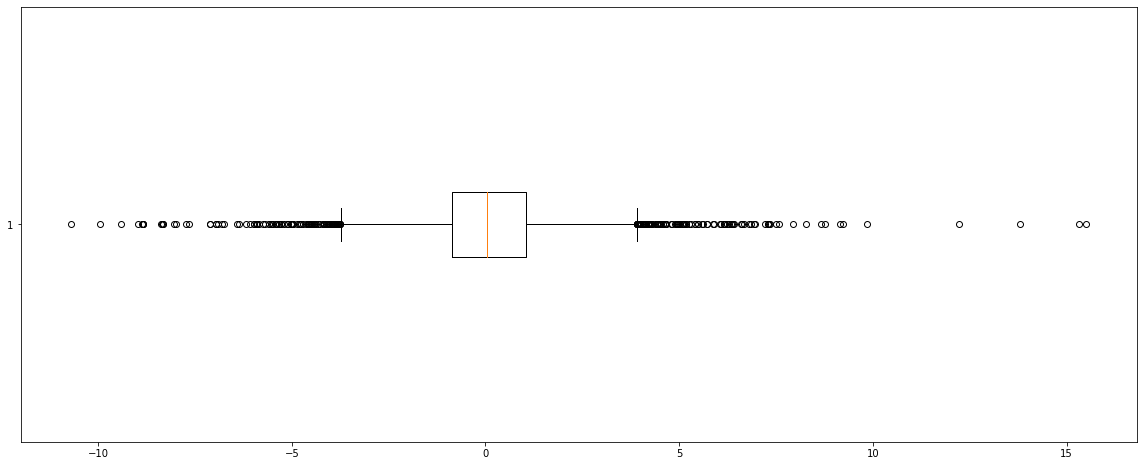

In [20]:
plt.boxplot(x,vert=False)

In [21]:
datac = datac[datac['returns percentage'] < 5]
datac = datac[datac['returns percentage'] > -5]
datac

,symbol,open,high,low,close,volume,date,returns percentage
date,,,,,,,,
2004-08-26,NSE:TCS,124.000000,124.625000,121.912499,122.375000,40443200.0,2004-08-26,-0.905917
2004-08-27,NSE:TCS,122.800003,122.800003,119.818749,120.331253,30646000.0,2004-08-27,-1.670069
2004-08-30,NSE:TCS,121.237503,123.750000,120.625000,123.343750,24465208.0,2004-08-30,2.503504
2004-08-31,NSE:TCS,123.312500,123.750000,122.000000,123.512497,21194656.0,2004-08-31,0.136811
2004-09-01,NSE:TCS,123.750000,124.375000,122.949997,123.487503,19935544.0,2004-09-01,-0.020237
...,...,...,...,...,...,...,...,...
2022-10-20,NSE:TCS,3105.000000,3160.000000,3105.000000,3157.300000,1587601.0,2022-10-20,1.135541
2022-10-21,NSE:TCS,3157.800000,3160.399900,3127.000000,3137.399900,1021913.0,2022-10-21,-0.630289
2022-10-24,NSE:TCS,3170.100100,3178.000000,3155.000000,3161.700000,260949.0,2022-10-24,0.774530


# Sampling and Transformation

In [22]:
timeseriesdf = data[['close']]
timeseriessq = data['close']
timeseriessq

date
2004-08-25     123.493751
2004-08-26     122.375000
2004-08-27     120.331253
2004-08-30     123.343750
2004-08-31     123.512497
                 ...     
2022-10-20    3157.300000
2022-10-21    3137.399900
2022-10-24    3161.700000
2022-10-25    3162.100100
2022-10-27    3157.399900
Name: close, Length: 4491, dtype: float64

#### Upsampling Data

In [23]:
upsampled = timeseriessq.resample('H').mean()
upsampled.head(25)

date
2004-08-25 00:00:00    123.493751
2004-08-25 01:00:00           NaN
2004-08-25 02:00:00           NaN
2004-08-25 03:00:00           NaN
2004-08-25 04:00:00           NaN
2004-08-25 05:00:00           NaN
2004-08-25 06:00:00           NaN
2004-08-25 07:00:00           NaN
2004-08-25 08:00:00           NaN
2004-08-25 09:00:00           NaN
2004-08-25 10:00:00           NaN
2004-08-25 11:00:00           NaN
2004-08-25 12:00:00           NaN
2004-08-25 13:00:00           NaN
2004-08-25 14:00:00           NaN
2004-08-25 15:00:00           NaN
2004-08-25 16:00:00           NaN
2004-08-25 17:00:00           NaN
2004-08-25 18:00:00           NaN
2004-08-25 19:00:00           NaN
2004-08-25 20:00:00           NaN
2004-08-25 21:00:00           NaN
2004-08-25 22:00:00           NaN
2004-08-25 23:00:00           NaN
2004-08-26 00:00:00    122.375000
Freq: H, Name: close, dtype: float64

In [24]:
upsampled.shape

(159289,)

#### Interpolate the missing value

In [25]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(25)

date
2004-08-25 00:00:00    123.493751
2004-08-25 01:00:00    123.447137
2004-08-25 02:00:00    123.400522
2004-08-25 03:00:00    123.353907
2004-08-25 04:00:00    123.307293
2004-08-25 05:00:00    123.260678
2004-08-25 06:00:00    123.214063
2004-08-25 07:00:00    123.167449
2004-08-25 08:00:00    123.120834
2004-08-25 09:00:00    123.074220
2004-08-25 10:00:00    123.027605
2004-08-25 11:00:00    122.980990
2004-08-25 12:00:00    122.934376
2004-08-25 13:00:00    122.887761
2004-08-25 14:00:00    122.841146
2004-08-25 15:00:00    122.794532
2004-08-25 16:00:00    122.747917
2004-08-25 17:00:00    122.701302
2004-08-25 18:00:00    122.654688
2004-08-25 19:00:00    122.608073
2004-08-25 20:00:00    122.561459
2004-08-25 21:00:00    122.514844
2004-08-25 22:00:00    122.468229
2004-08-25 23:00:00    122.421615
2004-08-26 00:00:00    122.375000
Freq: H, Name: close, dtype: float64

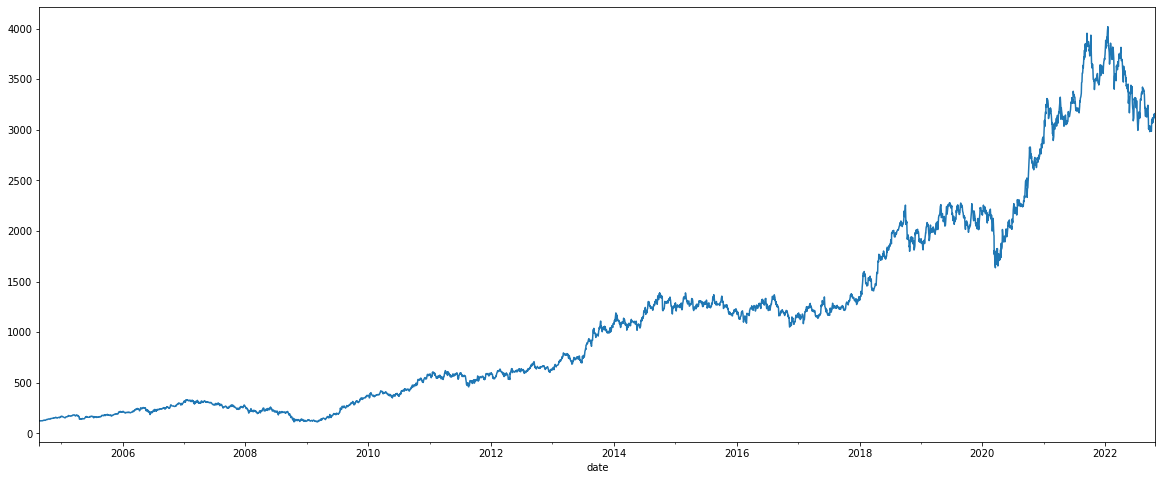

In [26]:
plt.rc("figure", figsize=(20,8))
interpolated.plot()

#### Downsampling Data

In [27]:
# downsample to quarterly intervals
resample = timeseriessq.resample('Q')
downsampled = resample.mean()

In [28]:
downsampled.head()

date
2004-09-30    125.783102
2004-12-31    149.345766
2005-03-31    169.459119
2005-06-30    156.831836
2005-09-30    168.654365
Freq: Q-DEC, Name: close, dtype: float64

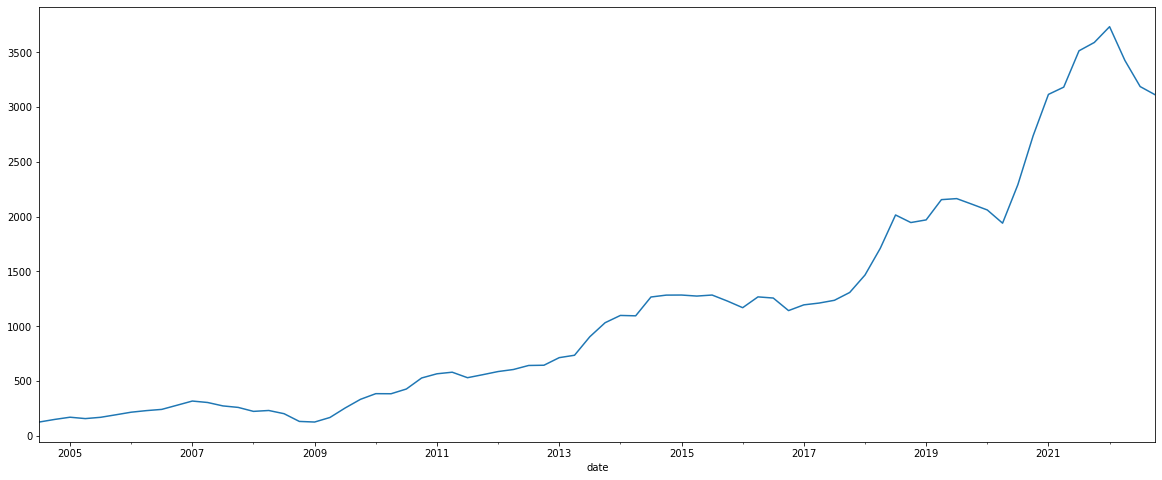

In [29]:
plt.rc("figure", figsize=(20,8))
downsampled.plot()

#### Tranformations

In [30]:
# load and plot a time series
timeseriesdf

,close
date,
2004-08-25,123.493751
2004-08-26,122.375000
2004-08-27,120.331253
2004-08-30,123.343750
2004-08-31,123.512497
...,...
2022-10-20,3157.300000
2022-10-21,3137.399900
2022-10-24,3161.700000


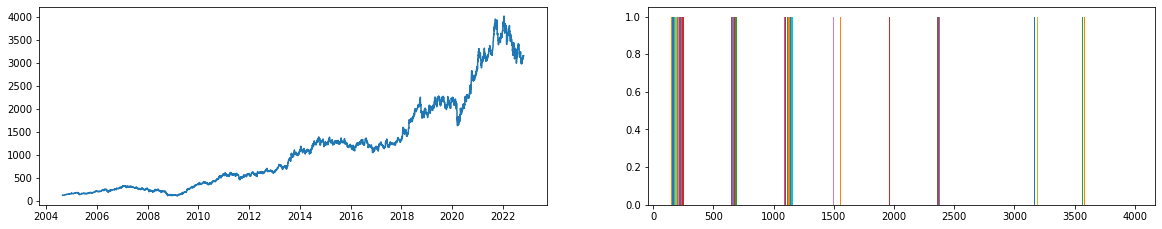

In [31]:
# line plot
plt.subplot(221)
plt.plot(timeseriesdf)

# histogram
plt.subplot(222)
plt.hist(timeseriesdf)

plt.show()

#### Square Root Transform

In [32]:
dataframe = pd.DataFrame(np.sqrt(timeseriesdf.values), columns = ['close'])
dataframe

,close
0,11.112774
1,11.062323
2,10.969560
3,11.106023
4,11.113618
...,...
4486,56.189857
4487,56.012498
4488,56.228996
4489,56.232554


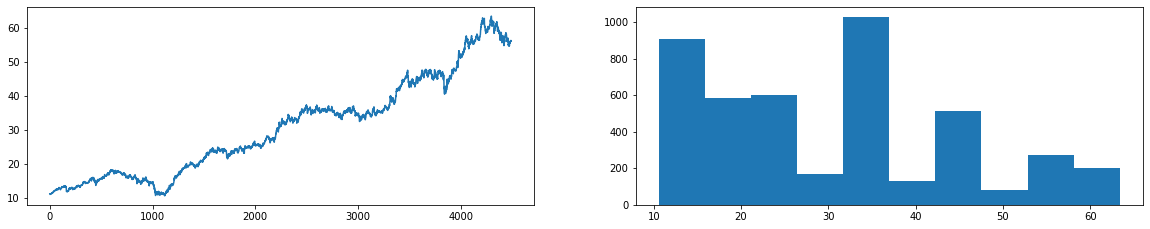

In [33]:
# line plot
plt.subplot(221)
plt.plot(dataframe['close'])

# histogram
plt.subplot(222)
plt.hist(dataframe['close'])

plt.show()

#### Log Transform

In [34]:
dataframe = pd.DataFrame(np.log(timeseriesdf.values), columns = ['close'])
dataframe

,close
0,4.816191
1,4.807090
2,4.790248
3,4.814975
4,4.816342
...,...
4486,8.057473
4487,8.051150
4488,8.058865
4489,8.058992


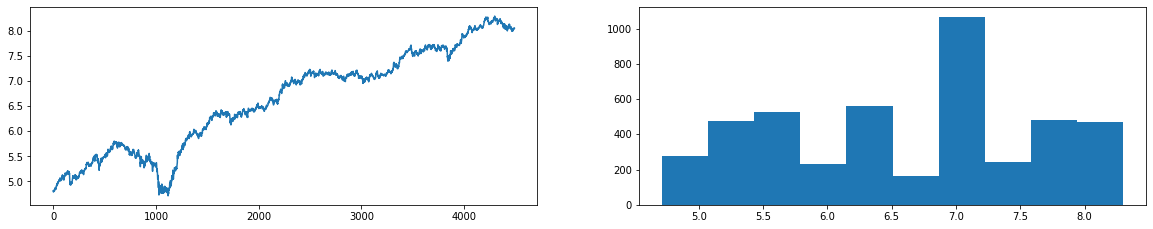

In [35]:
# line plot
plt.subplot(221)
plt.plot(dataframe['close'])

# histogram
plt.subplot(222)
plt.hist(dataframe['close'])
plt.show()

# Forecasting - Model Based

In [36]:
heatmapdata = data[['date','close']]
heatmapdata['date'] = pd.to_datetime(heatmapdata['date'])
heatmapdata

,date,close
date,,
2004-08-25,2004-08-25,123.493751
2004-08-26,2004-08-26,122.375000
2004-08-27,2004-08-27,120.331253
2004-08-30,2004-08-30,123.343750
2004-08-31,2004-08-31,123.512497
...,...,...
2022-10-20,2022-10-20,3157.300000
2022-10-21,2022-10-21,3137.399900
2022-10-24,2022-10-24,3161.700000


In [37]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

heatmapdata["month"] = heatmapdata['date'].dt.strftime("%b") # month extraction
heatmapdata["year"] = heatmapdata['date'].dt.strftime("%Y") # year extraction
heatmapdata["Day"] = heatmapdata['date'].dt.strftime("%d") # Day extraction
heatmapdata["wkday"] = heatmapdata['date'].dt.strftime("%A") # weekday extraction

heatmapdata

,date,close,month,year,Day,wkday
date,,,,,,
2004-08-25,2004-08-25,123.493751,Aug,2004,25,Wednesday
2004-08-26,2004-08-26,122.375000,Aug,2004,26,Thursday
2004-08-27,2004-08-27,120.331253,Aug,2004,27,Friday
2004-08-30,2004-08-30,123.343750,Aug,2004,30,Monday
2004-08-31,2004-08-31,123.512497,Aug,2004,31,Tuesday
...,...,...,...,...,...,...
2022-10-20,2022-10-20,3157.300000,Oct,2022,20,Thursday
2022-10-21,2022-10-21,3137.399900,Oct,2022,21,Friday
2022-10-24,2022-10-24,3161.700000,Oct,2022,24,Monday


In [38]:
heatmap_y_month = pd.pivot_table(data = heatmapdata,
                                 values = "close",
                                 index = "year",
                                 columns = "month",
                                 aggfunc = "mean",
                                 fill_value=0)
heatmap_y_month1 = heatmap_y_month[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
heatmap_y_month1

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.611250,126.503977,139.167763,150.456250,156.788043
2005,161.321711,169.072187,176.838636,160.239688,148.559091,162.006534,162.302500,164.033523,179.544643,179.152813,187.193092,206.871307
2006,208.370000,207.052632,228.627557,241.785662,241.957386,208.272443,228.672322,241.228977,252.675596,265.467106,277.513095,292.901250
2007,322.137500,320.594079,308.820833,307.069375,310.431548,294.226786,288.773295,269.051136,258.859375,268.592614,245.919886,262.950658
2008,232.811413,223.748810,208.703472,226.589376,239.878126,226.364880,205.109782,207.448749,191.703125,137.645000,129.165973,126.235713
2009,126.861875,123.634210,125.855000,144.936765,162.514999,187.882953,219.817390,262.080954,284.833753,306.555260,331.435003,357.839286
2010,377.496053,374.185529,399.919048,396.812497,372.842854,381.929545,401.571593,430.515909,449.491665,494.326190,527.097619,559.795455
2011,582.016250,561.010000,555.536364,595.611111,571.695455,576.357955,575.713095,502.324999,512.361905,536.896053,550.387500,583.335714
2012,561.939286,609.572500,588.520238,571.931579,616.960227,621.936905,614.713636,643.183333,671.551316,651.948810,652.710000,626.735000


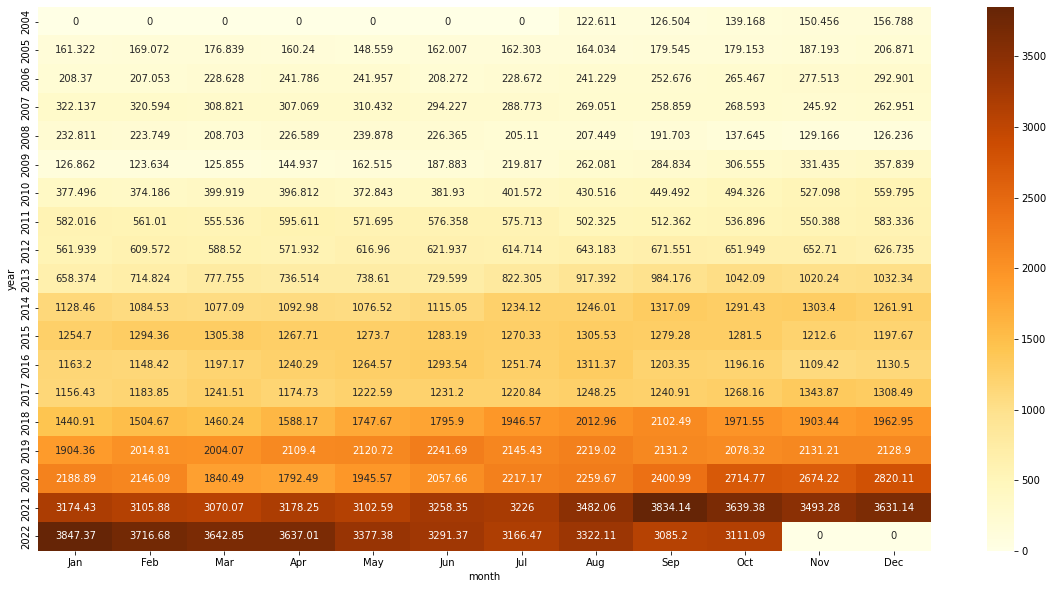

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(heatmap_y_month1,
            annot=True,
            fmt="g",
            cmap = 'YlOrBr') 

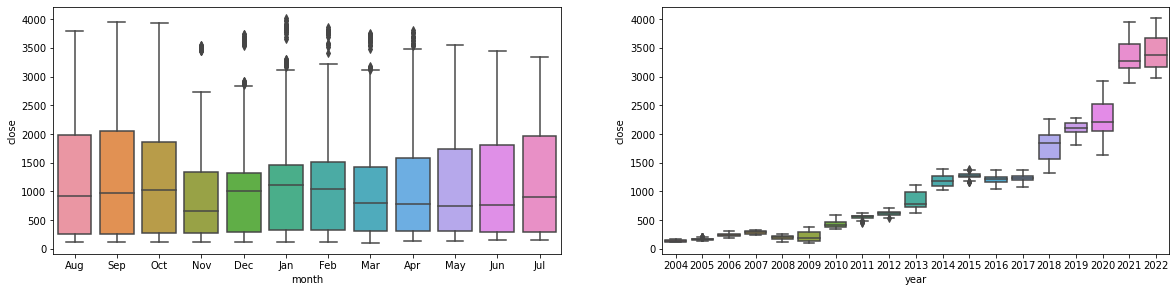

In [40]:
# Boxplot for every
plt.figure(figsize=(20,10))

plt.subplot(221)
sns.boxplot(x="month",y="close",data=heatmapdata)

plt.subplot(222)
sns.boxplot(x="year",y="close",data=heatmapdata)

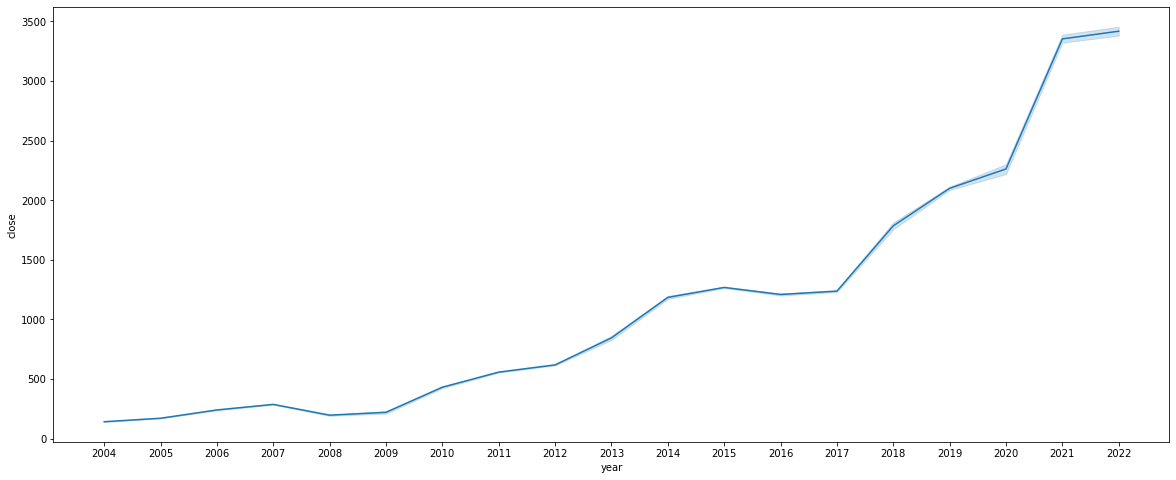

In [41]:
sns.lineplot(x="year",y="close",data=heatmapdata)

#### Splitting data

In [42]:
data1 = heatmapdata
data1

,date,close,month,year,Day,wkday
date,,,,,,
2004-08-25,2004-08-25,123.493751,Aug,2004,25,Wednesday
2004-08-26,2004-08-26,122.375000,Aug,2004,26,Thursday
2004-08-27,2004-08-27,120.331253,Aug,2004,27,Friday
2004-08-30,2004-08-30,123.343750,Aug,2004,30,Monday
2004-08-31,2004-08-31,123.512497,Aug,2004,31,Tuesday
...,...,...,...,...,...,...
2022-10-20,2022-10-20,3157.300000,Oct,2022,20,Thursday
2022-10-21,2022-10-21,3137.399900,Oct,2022,21,Friday
2022-10-24,2022-10-24,3161.700000,Oct,2022,24,Monday


In [43]:
data1['t'] = np.arange(1,data1.shape[0]+1)
data1['t_square'] = np.square(data1.t)
data1['log_close'] = np.log(data1.close)
data2 = pd.get_dummies(data1['month'])
data1 = pd.concat([data1, data2],axis=1)
data1 = data1.reset_index(drop = True)
data1

,date,close,month,year,Day,wkday,t,t_square,log_close,Apr,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2004-08-25,123.493751,Aug,2004,25,Wednesday,1,1,4.816191,0,...,0,0,0,0,0,0,0,0,0,0
1,2004-08-26,122.375000,Aug,2004,26,Thursday,2,4,4.807090,0,...,0,0,0,0,0,0,0,0,0,0
2,2004-08-27,120.331253,Aug,2004,27,Friday,3,9,4.790248,0,...,0,0,0,0,0,0,0,0,0,0
3,2004-08-30,123.343750,Aug,2004,30,Monday,4,16,4.814975,0,...,0,0,0,0,0,0,0,0,0,0
4,2004-08-31,123.512497,Aug,2004,31,Tuesday,5,25,4.816342,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4486,2022-10-20,3157.300000,Oct,2022,20,Thursday,4487,20133169,8.057473,0,...,0,0,0,0,0,0,0,0,1,0
4487,2022-10-21,3137.399900,Oct,2022,21,Friday,4488,20142144,8.051150,0,...,0,0,0,0,0,0,0,0,1,0
4488,2022-10-24,3161.700000,Oct,2022,24,Monday,4489,20151121,8.058865,0,...,0,0,0,0,0,0,0,0,1,0
4489,2022-10-25,3162.100100,Oct,2022,25,Tuesday,4490,20160100,8.058992,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
# Using 3/4th data for training and remaining for testing
test_size = round(0.25 * (data1.shape[0]+1))

Train = data1[:-test_size]
Test = data1[-test_size:]

In [45]:
Train

,date,close,month,year,Day,wkday,t,t_square,log_close,Apr,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2004-08-25,123.493751,Aug,2004,25,Wednesday,1,1,4.816191,0,...,0,0,0,0,0,0,0,0,0,0
1,2004-08-26,122.375000,Aug,2004,26,Thursday,2,4,4.807090,0,...,0,0,0,0,0,0,0,0,0,0
2,2004-08-27,120.331253,Aug,2004,27,Friday,3,9,4.790248,0,...,0,0,0,0,0,0,0,0,0,0
3,2004-08-30,123.343750,Aug,2004,30,Monday,4,16,4.814975,0,...,0,0,0,0,0,0,0,0,0,0
4,2004-08-31,123.512497,Aug,2004,31,Tuesday,5,25,4.816342,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,2018-04-09,1461.949950,Apr,2018,09,Monday,3364,11316496,7.287526,1,...,0,0,0,0,0,0,0,0,0,0
3364,2018-04-10,1468.800050,Apr,2018,10,Tuesday,3365,11323225,7.292201,1,...,0,0,0,0,0,0,0,0,0,0
3365,2018-04-11,1507.074950,Apr,2018,11,Wednesday,3366,11329956,7.317926,1,...,0,0,0,0,0,0,0,0,0,0
3366,2018-04-12,1569.625000,Apr,2018,12,Thursday,3367,11336689,7.358592,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
Test

,date,close,month,year,Day,wkday,t,t_square,log_close,Apr,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
3368,2018-04-16,1593.82495,Apr,2018,16,Monday,3369,11350161,7.373892,1,...,0,0,0,0,0,0,0,0,0,0
3369,2018-04-17,1583.30005,Apr,2018,17,Tuesday,3370,11356900,7.367267,1,...,0,0,0,0,0,0,0,0,0,0
3370,2018-04-18,1579.55005,Apr,2018,18,Wednesday,3371,11363641,7.364895,1,...,0,0,0,0,0,0,0,0,0,0
3371,2018-04-19,1595.57495,Apr,2018,19,Thursday,3372,11370384,7.374989,1,...,0,0,0,0,0,0,0,0,0,0
3372,2018-04-20,1701.22500,Apr,2018,20,Friday,3373,11377129,7.439104,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4486,2022-10-20,3157.30000,Oct,2022,20,Thursday,4487,20133169,8.057473,0,...,0,0,0,0,0,0,0,0,1,0
4487,2022-10-21,3137.39990,Oct,2022,21,Friday,4488,20142144,8.051150,0,...,0,0,0,0,0,0,0,0,1,0
4488,2022-10-24,3161.70000,Oct,2022,24,Monday,4489,20151121,8.058865,0,...,0,0,0,0,0,0,0,0,1,0
4489,2022-10-25,3162.10010,Oct,2022,25,Tuesday,4490,20160100,8.058992,0,...,0,0,0,0,0,0,0,0,1,0


### Trying basic models

In [47]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('close~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['close'])-np.array(pred_linear))**2))
rmse_linear

1147.3444822980398

In [48]:
#Exponential
Exp = smf.ols('log_close~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['close'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

384.8073235214471

In [49]:
#Quadratic 
Quad = smf.ols('close~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['close'])-np.array(pred_Quad))**2))
rmse_Quad

774.624735890269

In [50]:
#Additive seasonality 
add_sea = smf.ols('close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['close'])-np.array(pred_add_sea))**2))
rmse_add_sea

2081.0250109818917

In [51]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('close~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['close'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

774.8888565051225

In [52]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['close'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

2231.59617567134

In [53]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_close~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['close'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

385.3109840218574

In [54]:
#Compare the results 
datamodel = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(datamodel)
table = table_rmse.sort_values(['RMSE_Values'],ignore_index = True)
table

,MODEL,RMSE_Values
0,rmse_Exp,384.807324
1,rmse_Mult_add_sea,385.310984
2,rmse_Quad,774.624736
3,rmse_add_sea_quad,774.888857
4,rmse_linear,1147.344482
5,rmse_add_sea,2081.025011
6,rmse_Mult_sea,2231.596176


In [55]:
bestmodel = table.iloc[0,0]
bestmodel

if bestmodel == "rmse_linear" :
  formula = 'close~t'

if bestmodel == "rmse_Exp":
  formula = 'log_close~t'

if bestmodel == "rmse_Quad" :
  formula = 'close~t+t_square'

if bestmodel == "rmse_add_sea":
  formula = 'close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov'

if bestmodel == "rmse_add_sea_quad":
  formula = 'close~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov'

if bestmodel == "rmse_Mult_sea":
  formula = 'log_close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov'

if bestmodel == "rmse_Mult_add_sea":
  formula = 'log_close~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov'

formula

'log_close~t'

In [56]:
#Build the model on entire data set
model_full = smf.ols(formula,data=data1).fit()

In [57]:
pred_new  = pd.Series(model_full.predict(data1))
pred_new

0       4.951779
1       4.952520
2       4.953261
3       4.954002
4       4.954743
          ...   
4486    8.275414
4487    8.276155
4488    8.276896
4489    8.277637
4490    8.278378
Length: 4491, dtype: float64

In [58]:
if bestmodel == "rmse_Exp" or "rmse_Mult_sea" or "rmse_Mult_add_sea":
  data1["forecasted_close"] = pd.Series(np.exp(pred_new))
else:
  data1["forecasted_close"] = pd.Series((pred_new))

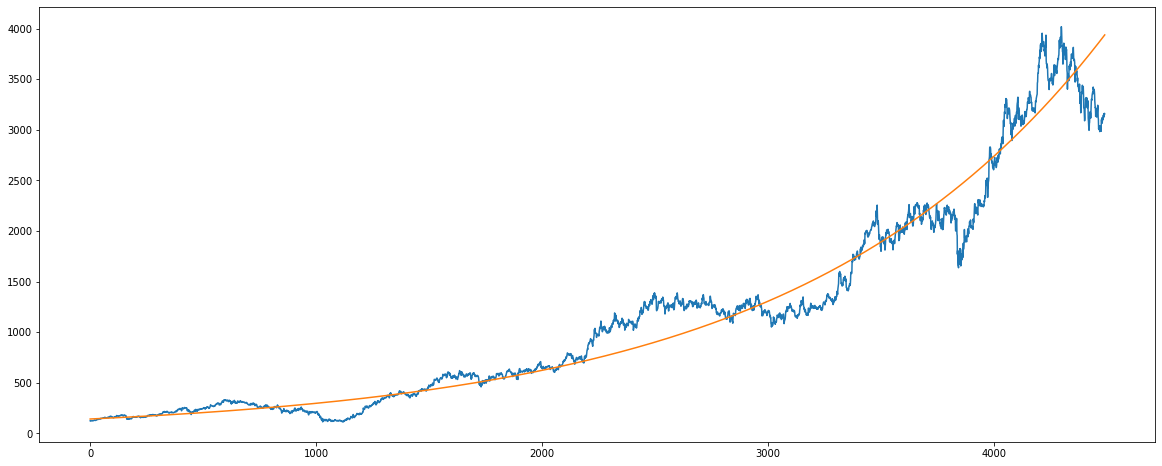

In [59]:
plt.figure(figsize = (20,8))

plt.plot(data1[['close','forecasted_close']].reset_index(drop=True))

In [60]:
data1

,date,close,month,year,Day,wkday,t,t_square,log_close,Apr,...,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,forecasted_close
0,2004-08-25,123.493751,Aug,2004,25,Wednesday,1,1,4.816191,0,...,0,0,0,0,0,0,0,0,0,141.426335
1,2004-08-26,122.375000,Aug,2004,26,Thursday,2,4,4.807090,0,...,0,0,0,0,0,0,0,0,0,141.531155
2,2004-08-27,120.331253,Aug,2004,27,Friday,3,9,4.790248,0,...,0,0,0,0,0,0,0,0,0,141.636053
3,2004-08-30,123.343750,Aug,2004,30,Monday,4,16,4.814975,0,...,0,0,0,0,0,0,0,0,0,141.741028
4,2004-08-31,123.512497,Aug,2004,31,Tuesday,5,25,4.816342,0,...,0,0,0,0,0,0,0,0,0,141.846082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4486,2022-10-20,3157.300000,Oct,2022,20,Thursday,4487,20133169,8.057473,0,...,0,0,0,0,0,0,0,1,0,3926.148083
4487,2022-10-21,3137.399900,Oct,2022,21,Friday,4488,20142144,8.051150,0,...,0,0,0,0,0,0,0,1,0,3929.058007
4488,2022-10-24,3161.700000,Oct,2022,24,Monday,4489,20151121,8.058865,0,...,0,0,0,0,0,0,0,1,0,3931.970087
4489,2022-10-25,3162.100100,Oct,2022,25,Tuesday,4490,20160100,8.058992,0,...,0,0,0,0,0,0,0,1,0,3934.884326


# Forecasting - Data Driven

In [61]:
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 


#### Moving Average 

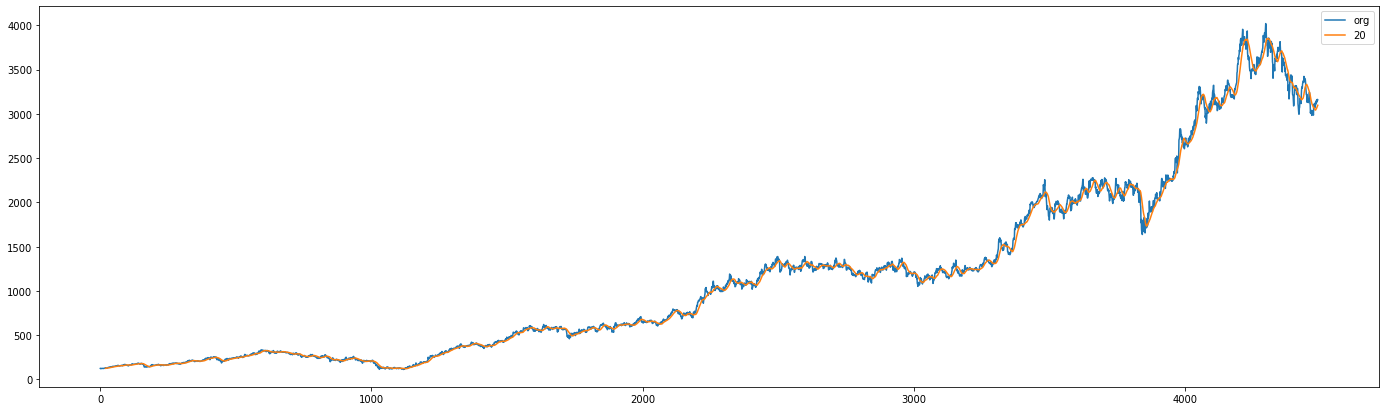

In [62]:
x=20

plt.figure(figsize=(24,7))
data1['close'].plot(label="org")
data1["close"].rolling(x).mean().plot(label=str(x))
plt.legend(loc='best')

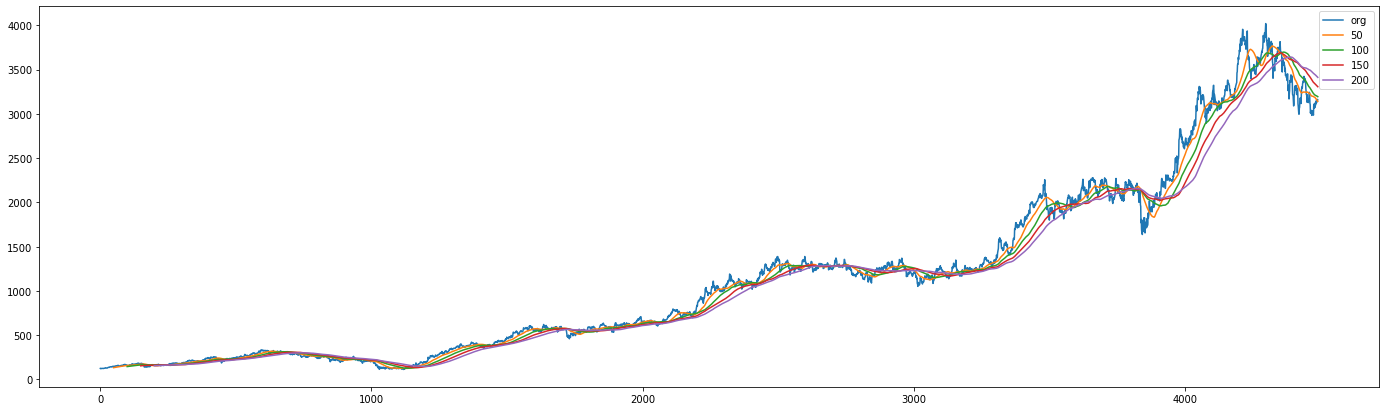

In [63]:
plt.figure(figsize=(24,7))
data1['close'].plot(label="org")
for i in range(50,201,50):
    data1["close"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

#### Time series decomposition plot 


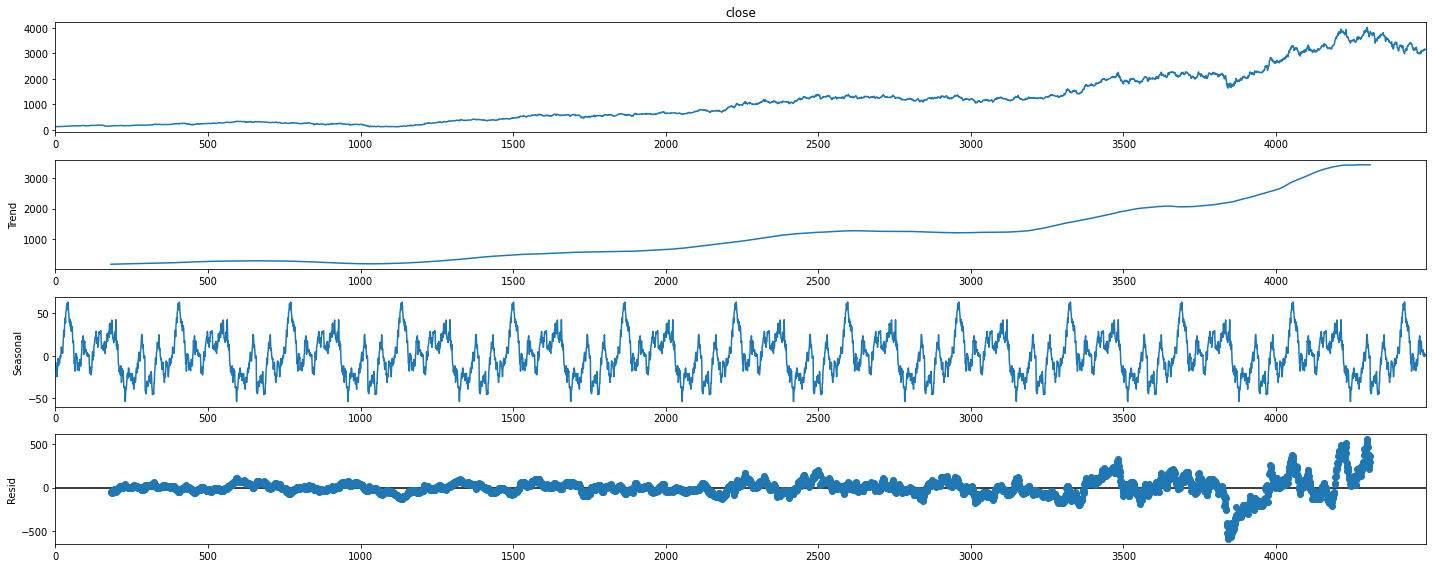

In [64]:
decompose_ts_add = seasonal_decompose(data1['close'], period = 365)
decompose_ts_add.plot()

plt.show()

#### ACF plots and PACF plots


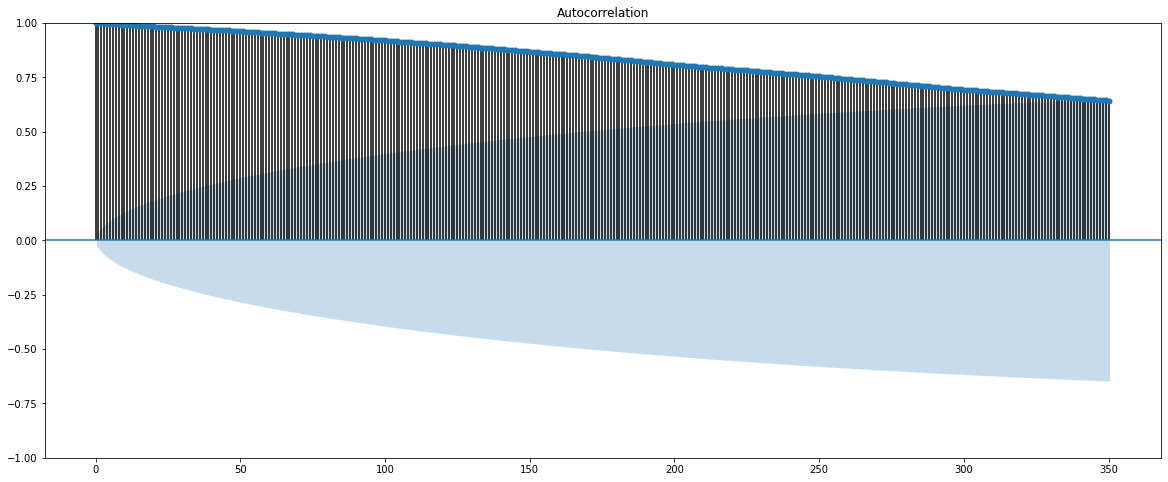

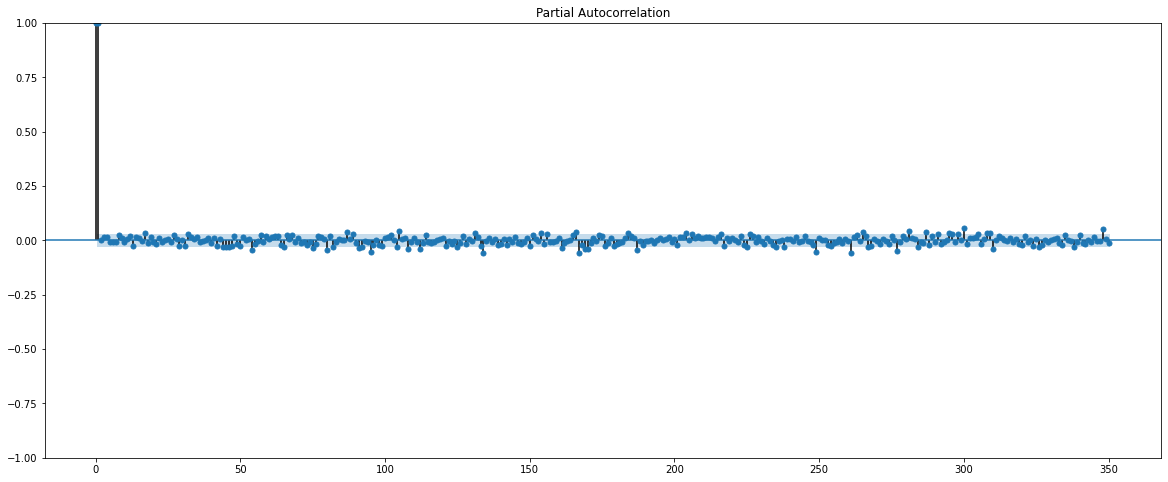

In [65]:
tsa_plots.plot_acf(data1.close,lags=350)
tsa_plots.plot_pacf(data1.close,lags=350)
plt.show()

### Evaluation Metric RMSE

In [66]:
def RMSE(pred,org):
  MSE = np.square(np.subtract(org,pred)).mean()   
  return np.sqrt(MSE) 

### Simple Exponential Method


In [67]:
ses_model = SimpleExpSmoothing(Train["close"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_ses,Test.close)

1305.40820022689

### Holt method 

In [68]:
# Holt method 
hw_model = Holt(Train["close"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hw,Test.close) 

10708.393292093639

### Holts winter exponential smoothing with additive seasonality and additive trend


In [69]:
hwe_model_add_add = ExponentialSmoothing(Train["close"],seasonal="add",trend="add",seasonal_periods=365).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hwe_add_add,Test.close) 

837.1242370269764

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [70]:
hwe_model_mul_add = ExponentialSmoothing(Train["close"],seasonal="mul",trend="add",seasonal_periods=365).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hwe_mul_add,Test.close)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



997.3407872635636

### Final Model by combining train and test

In [71]:
hwe_model_mul_add = ExponentialSmoothing(data["close"],seasonal="mul",trend="add",seasonal_periods=365).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [72]:
#Forecasting for next 12 time periods
forecasted = hwe_model_mul_add.forecast(730)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



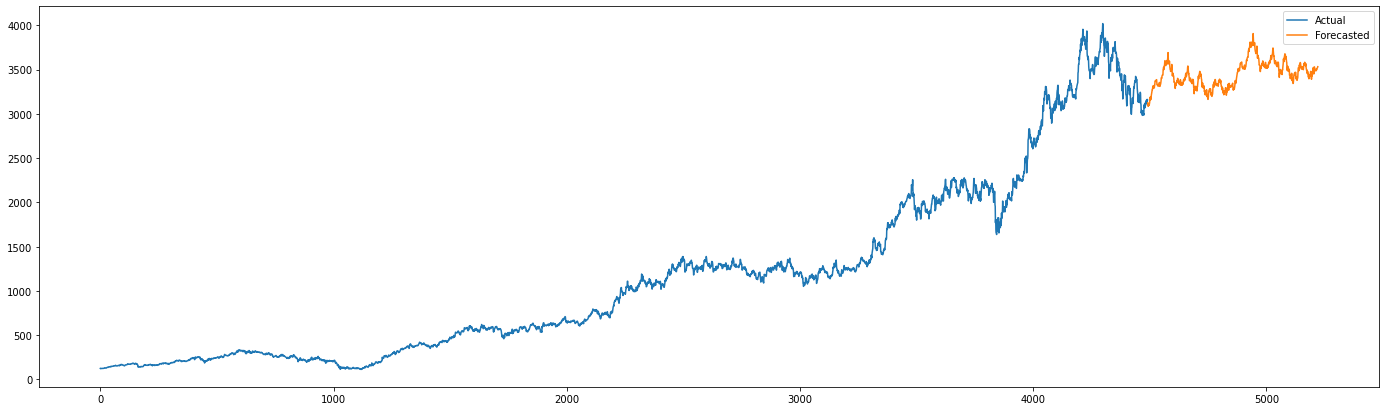

In [73]:
plt.figure(figsize=(24,7))
plt.plot(data1.close, label = "Actual")
plt.plot(forecasted, label = "Forecasted")
plt.legend()

# Forecasting using ARIMA,SARIMA and SARIMAX model

### Checking if the data is stationary or not

In [74]:
timeseriesdf

,close
date,
2004-08-25,123.493751
2004-08-26,122.375000
2004-08-27,120.331253
2004-08-30,123.343750
2004-08-31,123.512497
...,...
2022-10-20,3157.300000
2022-10-21,3137.399900
2022-10-24,3161.700000


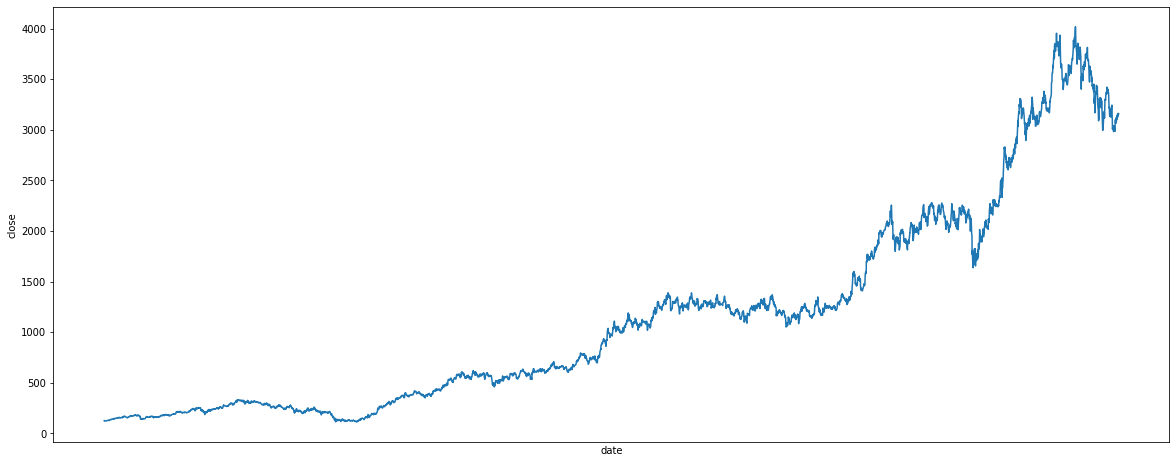

In [75]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

fig=plt.figure(figsize=(20,8))
sns.lineplot(data=timeseriesdf,x='date',y='close')
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False) 
plt.show()

### Augmented Dickey-Fuller Test

In [76]:
result=adfuller (timeseriesdf['close'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.809950
p-value: 0.991795
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


### Kwiatkowski Phillips Schmidt Shin (KPSS) test

In [77]:
result_kpss_ct=kpss(timeseriesdf['close'],regression="ct")
print('Test Statistic: %f' %result_kpss_ct[0])
print('p-value: %f' %result_kpss_ct[1])
print('Critical values:')
for key, value in result_kpss_ct[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 1.750657
p-value: 0.010000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [78]:
## Test Statistic in both Tests is greater than standard 0.05
## Hence the data can be classified as not Stationary

#### Trying to make data stationary

In [79]:
''' 
Steps that can be used to make data stationary
    Log transforming of the data
    Taking the square root of the data
    Taking the cube root
    Proportional change

    The steps for transformation are simple, this project uses square root transformation.

    Use NumPy’s square root function to transform the required column
    Then shift the transformation by one using the “shift’ function.
    Take the difference between both the original transformation and shift.
    Steps 2 and 3 can be done by just using the pandas “diff” function.
    
'''
#Transforming of the data

df_log=np.sqrt(timeseriesdf['close'])
df_diff=df_log.diff().dropna()
result=adfuller (df_diff)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -14.646034
p-value: 0.000000
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [80]:
result_kpss_ct_log=kpss(df_diff,regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.030000
p-value: 0.100000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [81]:
df_diff

date
2004-08-26   -0.050451
2004-08-27   -0.092763
2004-08-30    0.136463
2004-08-31    0.007595
2004-09-01   -0.001125
                ...   
2022-10-20    0.316338
2022-10-21   -0.177359
2022-10-24    0.216498
2022-10-25    0.003558
2022-10-27   -0.041808
Name: close, Length: 4490, dtype: float64

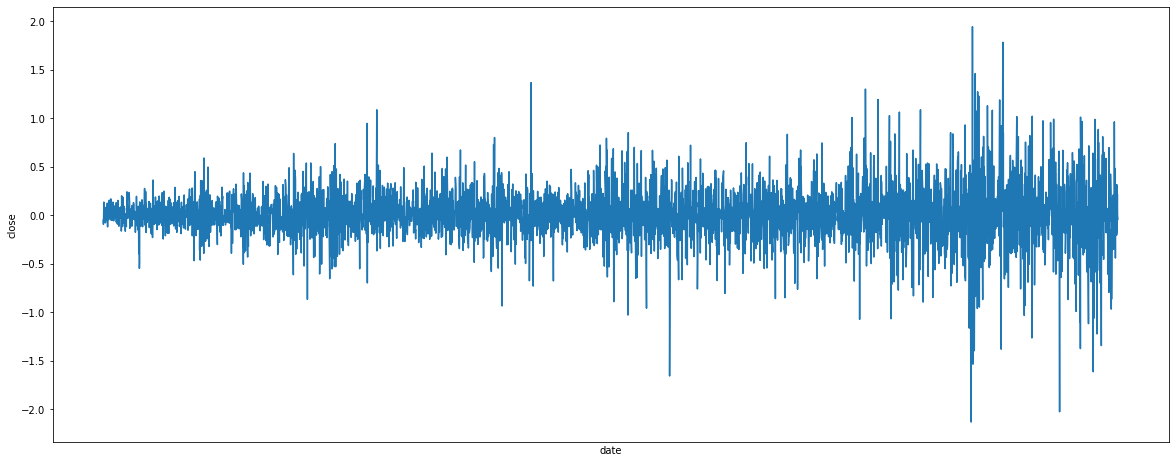

In [82]:
fig=plt.figure(figsize=(20,8))
sns.lineplot(data=df_diff)
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False) 
plt.show()

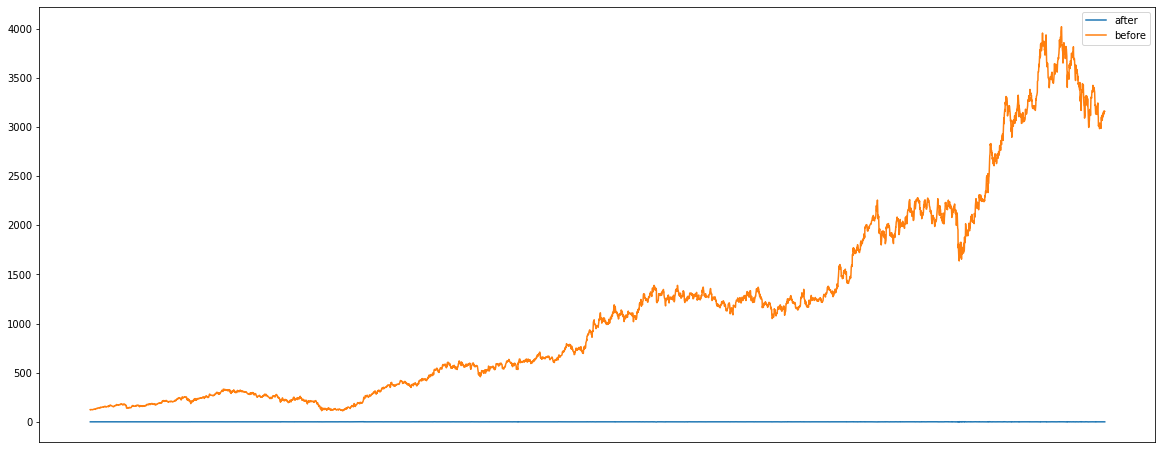

In [83]:
## Values of both the test statistics is below the standard value of 0.05

plt.figure(figsize=(20,8))
plt.plot(df_diff,label="after")
plt.plot(timeseriesdf,label="before")
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False)
plt.legend()
plt.show() 

In [84]:
df_diff

date
2004-08-26   -0.050451
2004-08-27   -0.092763
2004-08-30    0.136463
2004-08-31    0.007595
2004-09-01   -0.001125
                ...   
2022-10-20    0.316338
2022-10-21   -0.177359
2022-10-24    0.216498
2022-10-25    0.003558
2022-10-27   -0.041808
Name: close, Length: 4490, dtype: float64

In [85]:
stationarydf1 = df_diff

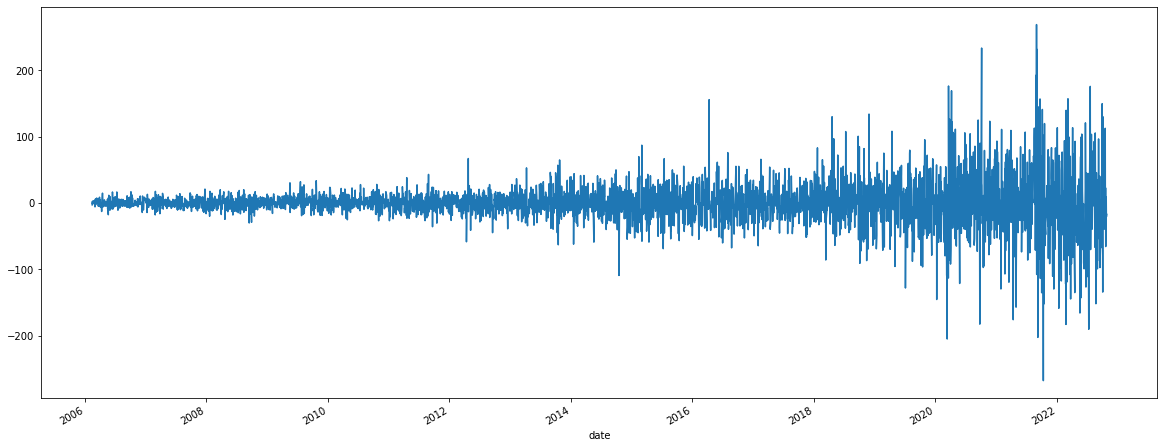

In [86]:
## We can also use basic differencing method to make data stationary

df_diffex = timeseriesdf.diff().diff(365).dropna()
diff_v2ex = timeseriesdf['close'].diff().diff(365).dropna()
time_seriesex = timeseriesdf.index
time_seriesex = time_seriesex.to_frame(index = True)
diff_v2ex.plot()

In [87]:
result=adfuller (diff_v2ex)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -14.464563
p-value: 0.000000
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [88]:
result_kpss_ct_log=kpss(diff_v2ex,regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.050000
p-value: 0.100000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




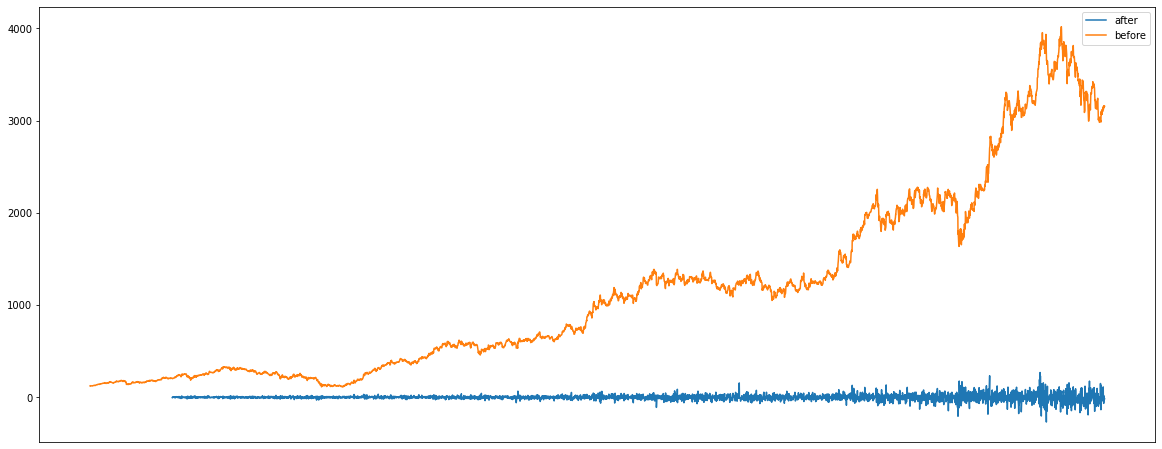

In [89]:
plt.figure(figsize=(20,8))
plt.plot(diff_v2ex,label="after")
plt.plot(timeseriesdf,label="before")
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False)
plt.legend()
plt.show() 

In [90]:
diff_v2ex

date
2006-02-14    -2.937499
2006-02-15     2.143747
2006-02-16    -1.787497
2006-02-17    -0.687498
2006-02-20     3.131245
                ...    
2022-10-20    22.699900
2022-10-21   -65.850100
2022-10-24     8.550100
2022-10-25   -21.049800
2022-10-27   -17.300300
Name: close, Length: 4125, dtype: float64

In [91]:
stationarydf2 = diff_v2ex

In [92]:
# Let's use original and both these stationary datasets for Auto-ARIMA


In [93]:
from pmdarima import auto_arima
stepwise_model = auto_arima(timeseriesdf, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=11.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=43962.453, Time=0.22 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=42750.505, Time=2.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=10.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=43964.422, Time=0.22 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=42255.768, Time=5.76 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=18.80 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=7.92 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=42254.104, Time=4.60 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=42748.778, Time=1.71 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=30.62 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=7.99 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=42255.758, Time=5.56 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=42257.278, Time=11.52 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept  

In [94]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 4491
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood              -21124.052
Date:                            Thu, 27 Oct 2022   AIC                          42254.104
Time:                                    12:24:06   BIC                          42273.325
Sample:                                         0   HQIC                         42260.879
                                           - 4491                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6462      0.008    -80.673      0.000      -0.662      -0.630
ar.S.L24      -0.3261      0.008    -39.884      0.000      -0.342      -0.310
sigma2       731.7054      6.301    116.134      0.000     719.357     744.054
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):             18927.14
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):              49.70   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
test_size = round((timeseriesdf.shape[0]) - 730)

Train = timeseriesdf[:test_size]
Test = timeseriesdf[test_size:]

In [96]:
Test

,close
date,
2019-11-22,2071.7000
2019-11-25,2081.5000
2019-11-26,2046.6500
2019-11-27,2054.3000
2019-11-28,2077.3501
...,...
2022-10-20,3157.3000
2022-10-21,3137.3999
2022-10-24,3161.7000


In [97]:
stepwise_model.fit(Train)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [98]:
future_forecast = stepwise_model.predict(n_periods=730)
future_forecast

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



3761    2123.508386
3762    2103.487608
3763    2125.401784
3764    2091.663367
3765    2088.120601
           ...     
4486    2465.022163
4487    2480.102395
4488    2490.578366
4489    2496.248744
4490    2476.927652
Length: 730, dtype: float64

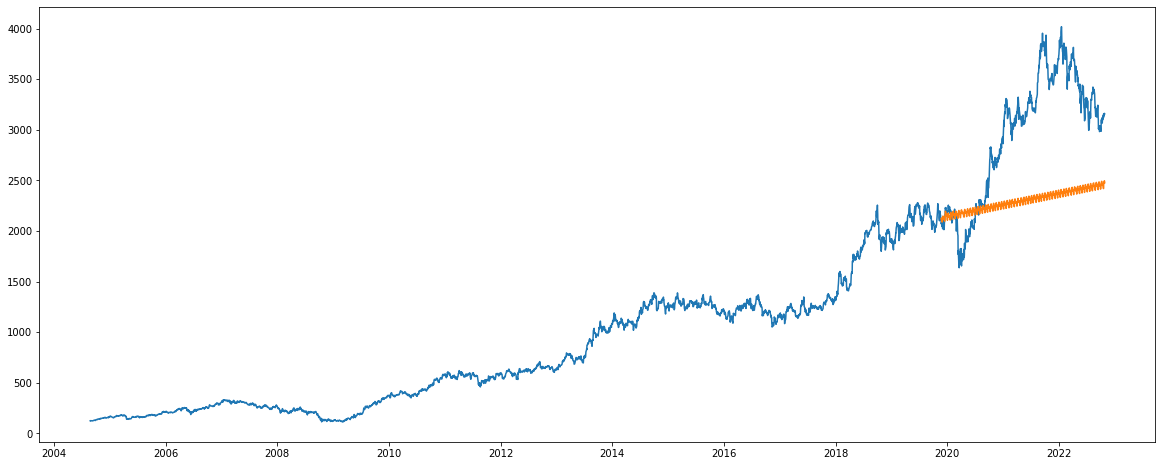

In [99]:
future_forecast1 = pd.DataFrame(index = Test.index,columns=['Prediction'])
future_forecast1.Prediction = future_forecast.values
future_forecast1
plt.figure(figsize=(20,8))
plt.plot(timeseriesdf.close)
plt.plot(future_forecast1)

In [100]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse = rmse(data["close"], future_forecast1)
  


In [101]:
# Auto ARIMA on complete Dataset
import itertools
from math import sqrt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [102]:
#Standard ARIMA Model
ARIMA_model = pm.auto_arima(data1['close'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

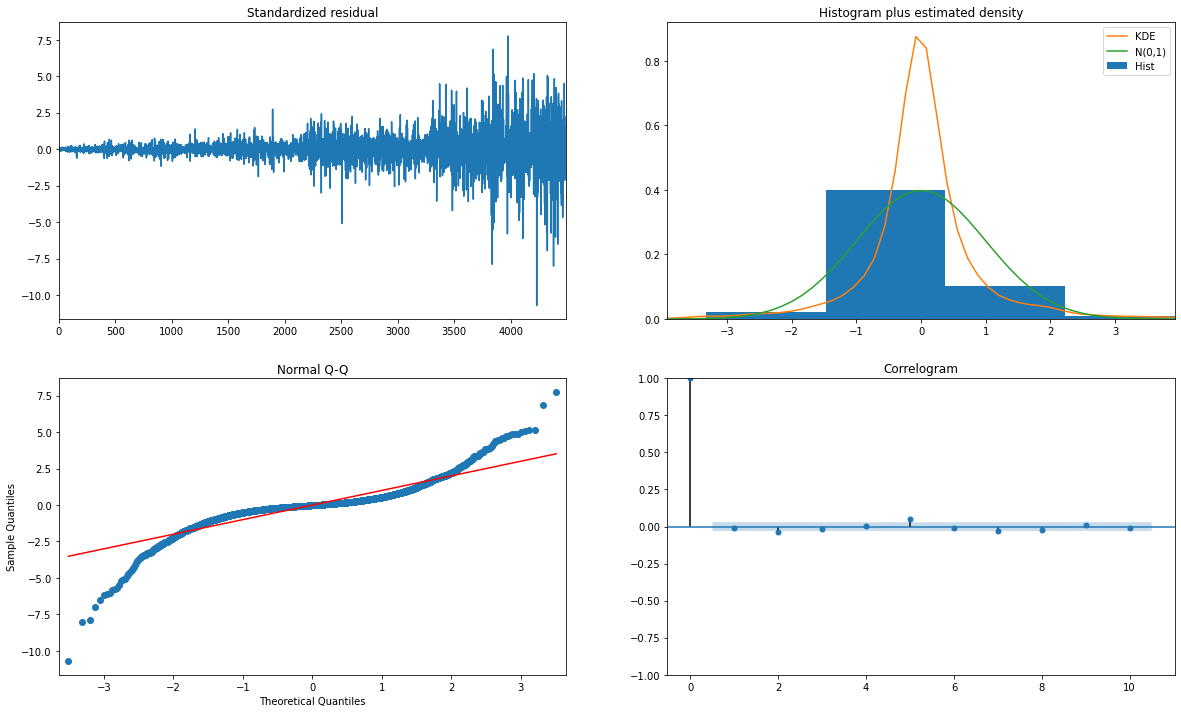

In [103]:
ARIMA_model.plot_diagnostics(figsize=(20,12))
plt.show()

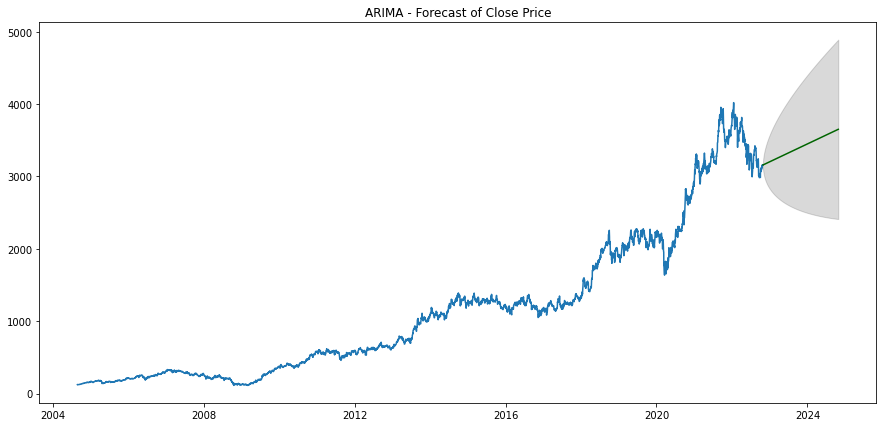

In [104]:
from pandas.tseries.frequencies import DAYS
def forecast(ARIMA_model, periods=730):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(data.index[-1] + pd.DateOffset(days=1), periods = n_periods, freq='D')
    
    # make series for plotting purpose
    fitted_series = pd.Series(fitted.values, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(data["close"])
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA - Forecast of Close Price")
    plt.show()

forecast(ARIMA_model)

# Naive Predictions / Persistence / Base model

In [105]:
# evaluate a persistence model
print('Dataset %d, Validation %d' % (len(Train), len(Test)))

train = Train.close.values.astype('float32')

test = Test.close.values.astype('float32')

Dataset 3761, Validation 730


In [106]:
# walk-forward validation
history = [x for x in train]
history

[123.49375,
 122.375,
 120.33125,
 123.34375,
 123.5125,
 123.4875,
 124.20625,
 124.73125,
 124.35625,
 124.45,
 124.2125,
 122.49375,
 123.6,
 125.4375,
 126.95625,
 125.7625,
 126.05625,
 128.0625,
 127.8625,
 130.725,
 131.50626,
 128.78125,
 128.6,
 127.59375,
 126.94375,
 128.875,
 128.3875,
 130.9625,
 134.5625,
 135.0875,
 135.2,
 137.1375,
 137.25626,
 136.1625,
 135.55624,
 139.525,
 140.75,
 142.15625,
 142.9,
 141.65625,
 140.69376,
 139.66875,
 142.15,
 142.4875,
 145.74374,
 144.53125,
 146.33125,
 144.9625,
 146.9,
 146.3,
 145.68124,
 148.01875,
 148.55,
 149.29375,
 149.53125,
 149.59375,
 148.8625,
 150.675,
 153.875,
 152.1375,
 152.80624,
 154.44376,
 154.2375,
 152.10625,
 155.4875,
 159.33125,
 157.69376,
 155.325,
 154.59375,
 151.81876,
 152.28125,
 150.1,
 151.43124,
 153.20625,
 154.51875,
 154.14375,
 155.6875,
 157.83125,
 157.0625,
 157.81876,
 159.0875,
 155.01875,
 153.48125,
 158.49374,
 158.81876,
 163.66875,
 165.03125,
 162.08125,
 166.93124,
 169.156

In [107]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=2118.100, Expected=2071.700
>Predicted=2071.700, Expected=2081.500
>Predicted=2081.500, Expected=2046.650
>Predicted=2046.650, Expected=2054.300
>Predicted=2054.300, Expected=2077.350
>Predicted=2077.350, Expected=2053.250
>Predicted=2053.250, Expected=2021.050
>Predicted=2021.050, Expected=2051.000
>Predicted=2051.000, Expected=2078.500
>Predicted=2078.500, Expected=2121.300
>Predicted=2121.300, Expected=2123.600
>Predicted=2123.600, Expected=2060.450
>Predicted=2060.450, Expected=2012.850
>Predicted=2012.850, Expected=2041.900
>Predicted=2041.900, Expected=2020.900
>Predicted=2020.900, Expected=2071.250
>Predicted=2071.250, Expected=2126.750
>Predicted=2126.750, Expected=2164.950
>Predicted=2164.950, Expected=2167.750
>Predicted=2167.750, Expected=2229.050
>Predicted=2229.050, Expected=2222.900
>Predicted=2222.900, Expected=2231.700
>Predicted=2231.700, Expected=2215.600
>Predicted=2215.600, Expected=2201.950
>Predicted=2201.950, Expected=2198.500
>Predicted=2198.500, Expe

In [108]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 47.015


#LSTM ANN

In [109]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [113]:
new_data=data.drop(['symbol','open','high','low','volume','date','returns percentage'],axis=1)
new_data

,close
date,
2004-08-25,123.493751
2004-08-26,122.375000
2004-08-27,120.331253
2004-08-30,123.343750
2004-08-31,123.512497
...,...
2022-10-20,3157.300000
2022-10-21,3137.399900
2022-10-24,3161.700000


In [114]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:3585,:]
valid = dataset[3585:,:]

In [115]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(46,len(train)):
    x_train.append(scaled_data[i-46:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [116]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

3539/3539 - 70s - loss: 2.4380e-04 - 70s/epoch - 20ms/step


In [117]:
#predicting 896 values, using past 46 from the train data
inputs = new_data[len(new_data) - len(valid) - 46:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(46,inputs.shape[0]):
    X_test.append(inputs[i-46:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

29/29 [==============================] - 1s 13ms/step


In [118]:
# Results
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

67.34124347528378

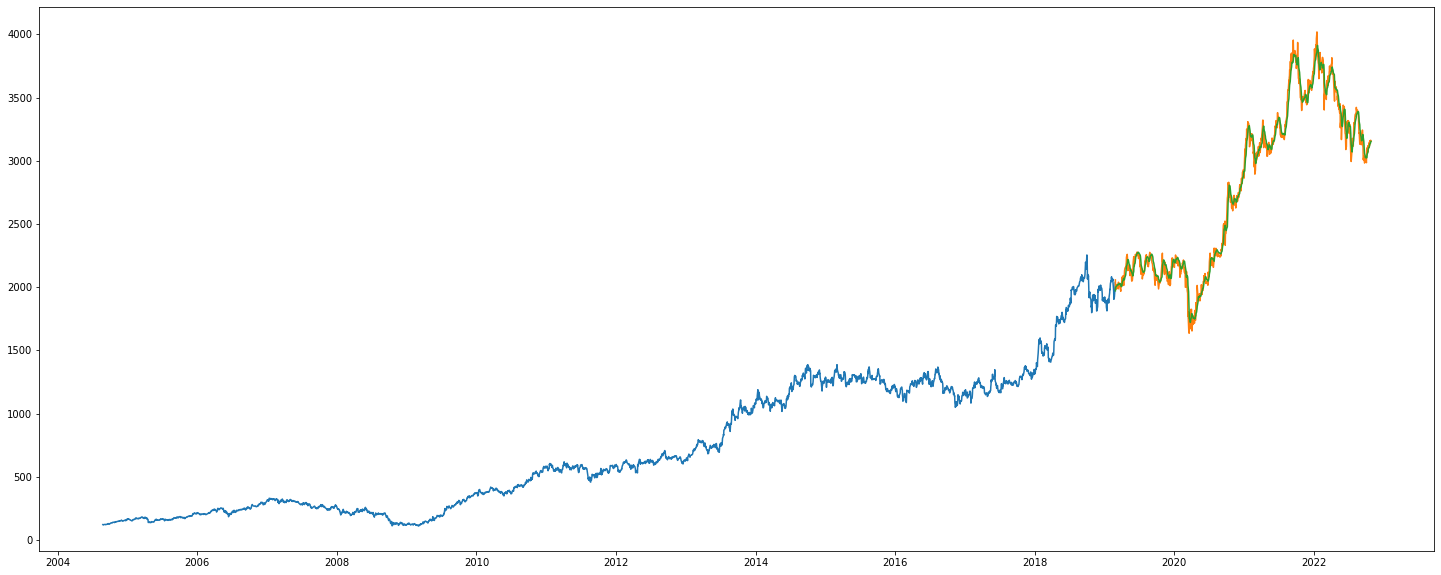

In [119]:
#for plotting
plt.figure(figsize=(25,10))
train = new_data[:3585]
valid = new_data[3585:]
valid['Predictions'] = closing_price
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])

#FB PROPHET

In [120]:
!pip install pystan~=2.14 --quiet
!pip install fbprophet --quiet

     |████████████████████████████████| 67.3 MB 137 kB/s 
     |████████████████████████████████| 64 kB 1.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [121]:
import fbprophet
from fbprophet import Prophet

In [122]:
data2 = data
data2['ds'] = pd.to_datetime(data['date'])
data2['y'] = (data2['close'])
data2 = data2[['ds','y']].reset_index(drop = True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4491 entries, 0 to 4490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4491 non-null   datetime64[ns]
 1   y       4491 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 70.3 KB


In [123]:
data2

,ds,y
0,2004-08-25,123.493751
1,2004-08-26,122.375000
2,2004-08-27,120.331253
3,2004-08-30,123.343750
4,2004-08-31,123.512497
...,...,...
4486,2022-10-20,3157.300000
4487,2022-10-21,3137.399900
4488,2022-10-24,3161.700000
4489,2022-10-25,3162.100100


In [124]:
model = Prophet()
model.fit(data2)
model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [125]:
future = model.make_future_dataframe(periods = 730)
future

,ds
0,2004-08-25
1,2004-08-26
2,2004-08-27
3,2004-08-30
4,2004-08-31
...,...
5216,2024-10-22
5217,2024-10-23
5218,2024-10-24
5219,2024-10-25


In [126]:
pred = model.predict(future)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-08-25,110.799039,-63.858469,349.953540,110.799039,110.799039,23.887122,23.887122,23.887122,12.445564,12.445564,12.445564,11.441558,11.441558,11.441558,0.0,0.0,0.0,134.686161
1,2004-08-26,110.976129,-65.821169,355.250983,110.976129,110.976129,22.943108,22.943108,22.943108,11.786346,11.786346,11.786346,11.156762,11.156762,11.156762,0.0,0.0,0.0,133.919237
2,2004-08-27,111.153219,-68.307822,337.202502,111.153219,111.153219,21.639227,21.639227,21.639227,10.838896,10.838896,10.838896,10.800330,10.800330,10.800330,0.0,0.0,0.0,132.792445
3,2004-08-30,111.684488,-73.812807,336.314037,111.684488,111.684488,22.763604,22.763604,22.763604,13.357122,13.357122,13.357122,9.406482,9.406482,9.406482,0.0,0.0,0.0,134.448092
4,2004-08-31,111.861578,-74.940113,328.962640,111.861578,111.861578,22.202121,22.202121,22.202121,13.328450,13.328450,13.328450,8.873671,8.873671,8.873671,0.0,0.0,0.0,134.063699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216,2024-10-22,4695.527896,4337.540679,5051.410933,4403.481777,4967.525177,7.385285,7.385285,7.385285,13.328450,13.328450,13.328450,-5.943166,-5.943166,-5.943166,0.0,0.0,0.0,4702.913181
5217,2024-10-23,4696.893215,4336.798391,5075.203939,4404.280753,4969.485933,6.869693,6.869693,6.869693,12.445564,12.445564,12.445564,-5.575871,-5.575871,-5.575871,0.0,0.0,0.0,4703.762908
5218,2024-10-24,4698.258534,4325.404590,5028.742265,4405.079729,4971.492189,6.704786,6.704786,6.704786,11.786346,11.786346,11.786346,-5.081560,-5.081560,-5.081560,0.0,0.0,0.0,4704.963320
5219,2024-10-25,4699.623852,4317.281159,5047.706992,4405.904563,4973.637957,6.365665,6.365665,6.365665,10.838896,10.838896,10.838896,-4.473231,-4.473231,-4.473231,0.0,0.0,0.0,4705.989518


In [127]:
pred[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2004-08-25,134.686161,-63.858469,349.953540
1,2004-08-26,133.919237,-65.821169,355.250983
2,2004-08-27,132.792445,-68.307822,337.202502
3,2004-08-30,134.448092,-73.812807,336.314037
4,2004-08-31,134.063699,-74.940113,328.962640


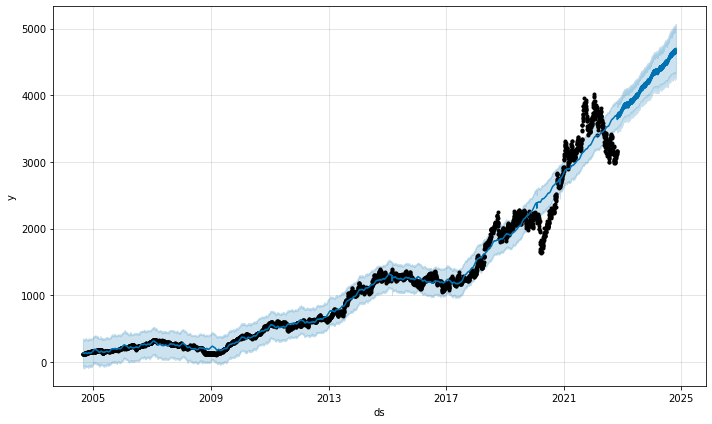

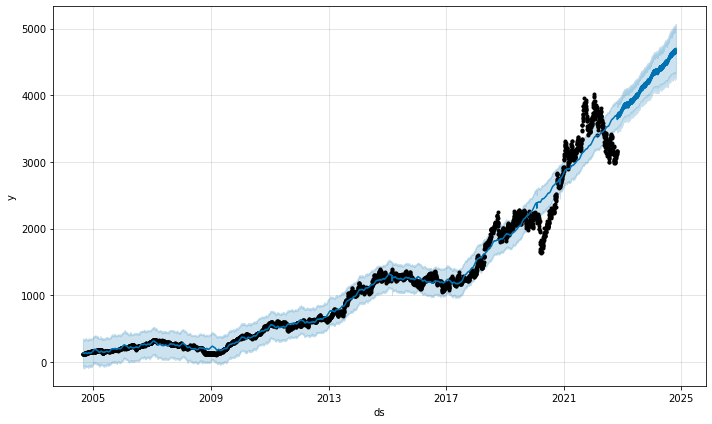

In [128]:
model.plot(pred)

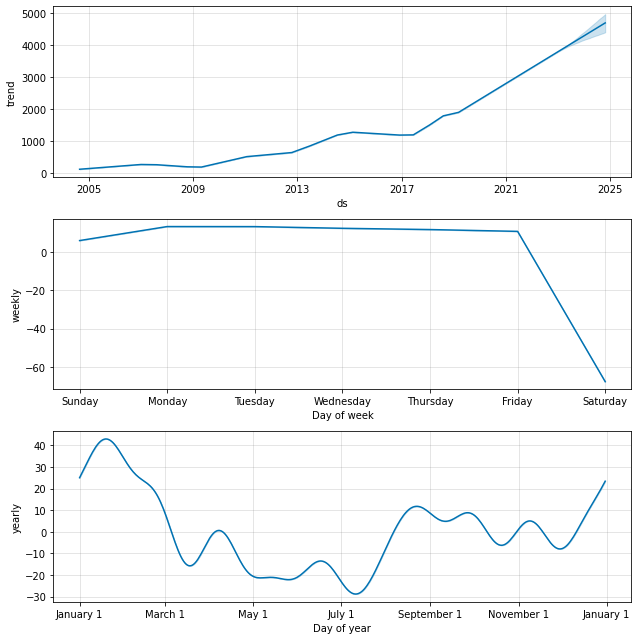

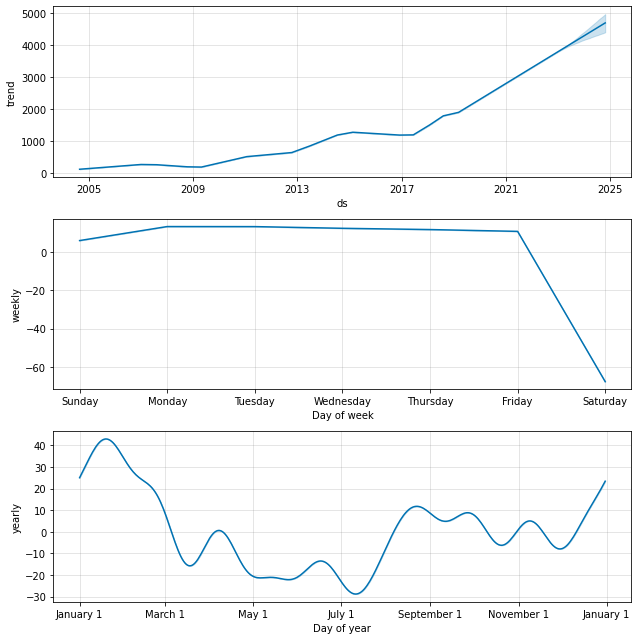

In [129]:
model.plot_components(pred)

In [130]:
se = np.square(pred.loc[:, 'yhat'] - data2.y)
mse = np.mean(se)
rmse = np.sqrt(mse)
rmse

157.45876419334704

# Deployment

In [144]:
pip freeze

absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.2.0
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.9
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==0.9.5
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
debugpy==1.0.0
decorator==4.4.